Fig. 1d and Extended Data Fig 1a

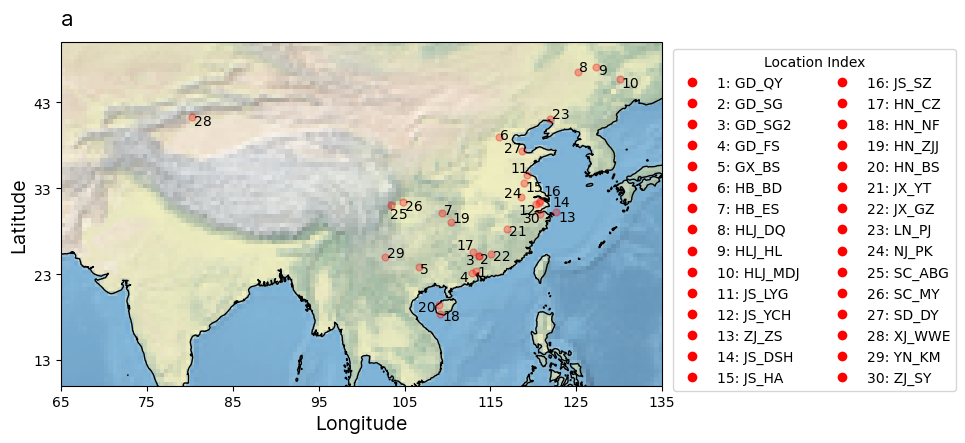

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Data: Locations and their coordinates
locations = [
    ("GD_QY", 23.35, 113.3333),
    ("GD_SG", 25.101389, 113.638889),
    ("GD_SG2", 25.115150, 113.633730),
    ("GD_FS", 23.162500, 112.854444),
    ("GX_BS", 23.836846, 106.634030),
    ("HB_BD", 38.915550, 115.948367),
    ("HB_ES", 30.112331, 109.394569),
    ("HLJ_DQ", 46.581667, 125.166111),
    ("HLJ_HL", 47.162247, 127.312095),
    ("HLJ_MDJ", 45.662769, 130.061013),
    ("JS_LYG", 34.550556, 119.314167),
    ("JS_YCH", 31.473756, 120.771911),
    ("ZJ_ZS", 30.182576, 122.686096),
    ("JS_DSH", 31.289834, 120.693797),
    ("JS_HA", 33.594167, 118.885278),
    ("JS_SZ", 31.115020733648095, 120.32461950078711),
    ("HN_CZ", 25.591667, 113.014722),
    ("HN_NF", 18.370215, 109.188711),
    ("HN_ZJJ", 29.113622, 110.404061),
    ("HN_BS", 19.439761, 109.070990),
    ("JX_YT", 28.199247, 116.924393),
    ("JX_GZ", 25.2933, 115.0764),
    ("LN_PJ", 41.099850, 121.957159),
    ("NJ_PK", 31.967157, 118.603041),
    ("SC_ABG", 30.988699, 103.467455),
    ("SC_MY", 31.388139, 104.815840),
    ("SD_DY", 37.367896, 118.740564),
    ("XJ_WWE", 41.295636, 80.240259),
    ("YN_KM", 24.9976, 102.7140),
    ("ZJ_SY", 30.002231, 120.799483)
]

# Extract latitudes and longitudes
latitudes = [lat for _, lat, _ in locations]
longitudes = [lon for _, _, lon in locations]

# Calculate the minimum and maximum latitudes and longitudes
lat_min, lat_max = min(latitudes), max(latitudes)
lon_min, lon_max = min(longitudes), max(longitudes)

# Extend the ranges by 50%
lat_margin = (lat_max - lat_min) * 0.5
lon_margin = (lon_max - lon_min) * 0.5

# Calculate the new boundaries
lat_min -= lat_margin
lat_max += lat_margin
lon_min -= lon_margin
lon_max += lon_margin

# Plotting the world map with Cartopy
plt.figure(figsize=(10.75, 6.1))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

# Offsets for each label (x_offset, y_offset)
label_offsets = {
    "GD_QY": (0.2, -0.1),
    "GD_SG": (0.2, -0.3),
    "GD_SG2": (-1.5, -0.5),
    "GD_FS": (-1.5, -0.5),
    "GX_BS": (0.2, -0.2),
    "HB_BD": (0.2, 0.3),
    "HB_ES": (0.2, 0.3),
    "HLJ_DQ": (0.2, 0.5),
    "HLJ_HL": (0.2, -0.4),
    "HLJ_MDJ": (0.2, -0.4),
    "JS_LYG": (-2, 0.8),
    "JS_YCH": (-2.5, -1),
    "ZJ_ZS": (0.2, -0.5),
    "JS_DSH": (1.5, 0.1),
    "JS_HA": (0.2, -0.5),
    "JS_SZ": (0.8, 1.5),
    "HN_CZ": (-2, 0.8),
    "HN_NF": (0.2, -0.3),
    "HN_ZJJ": (0.2, 0.4),
    "HN_BS": (-2.5, -0.3),
    "JX_YT": (0.2, -0.2),
    "JX_GZ": (0.2, -0.2),
    "LN_PJ": (0.2, 0.5),
    "NJ_PK": (-2, 0.5),
    "SC_ABG": (-0.2, -1),
    "SC_MY": (0.2, -0.5),
    "SD_DY": (-2.2, 0.3),
    "XJ_WWE": (0.2, -0.5),
    "YN_KM": (0.2, 0.5),
    "ZJ_SY": (-2, -0.5)
}

# Plotting the scatter points with numeric labels
for i, (name, lat, lon) in enumerate(locations, 1):
    ax.plot(lon, lat, 'ro', markersize=5, alpha=0.3)  # 'ro' for red circle markers
    offset = label_offsets.get(name, (0, 0))  # Get the corresponding offset or use (0, 0) if not specified
    ax.text(lon + offset[0], lat + offset[1], str(i), fontsize=10, ha='left', va='center', color='black')  # Adding number labels

# Set the map's region based on the calculated boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())



# Add label at the top-left corner
plt.text(0, 1.05, 'a', font='Inter', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)

# Adjust the density of ticks by selecting fewer intervals
ax.grid(True, linestyle='--', color='gray', alpha=0.5)  # Customize grid lines

# Reduce the density of longitude and latitude ticks
ax.set_xticks(range(int(lon_min), int(lon_max) + 1, 10), crs=ccrs.PlateCarree())  # Set longitude ticks every 5 degrees
ax.set_yticks(range(int(lat_min), int(lat_max) + 1, 10), crs=ccrs.PlateCarree())  # Set latitude ticks every 5 degrees

ax.xaxis.set_tick_params(labelsize=10)  # Customize tick label size
ax.yaxis.set_tick_params(labelsize=10)

plt.xlabel('Longitude', fontsize=14, fontname='Inter')
plt.ylabel('Latitude', fontsize=14, fontname='Inter')
# Hide grid lines and show map
plt.grid(False)
plt.ylim(10,50)
plt.xlim(65,135)

# Add legend (corresponding number labels with locations)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=8) for _ in locations]
labels = [f"{i}: {name}" for i, (name, _, _) in enumerate(locations, 1)]
plt.legend(handles, labels, title="Location Index", fontsize=10, loc="upper right", bbox_to_anchor=(1.5, 1.0), ncol=2)

# Display and save the figure
plt.tight_layout()
plt.savefig("Extended Data Fig. 1a.tif", dpi=600, bbox_inches='tight')
plt.show()


Extended Data Fig 1b

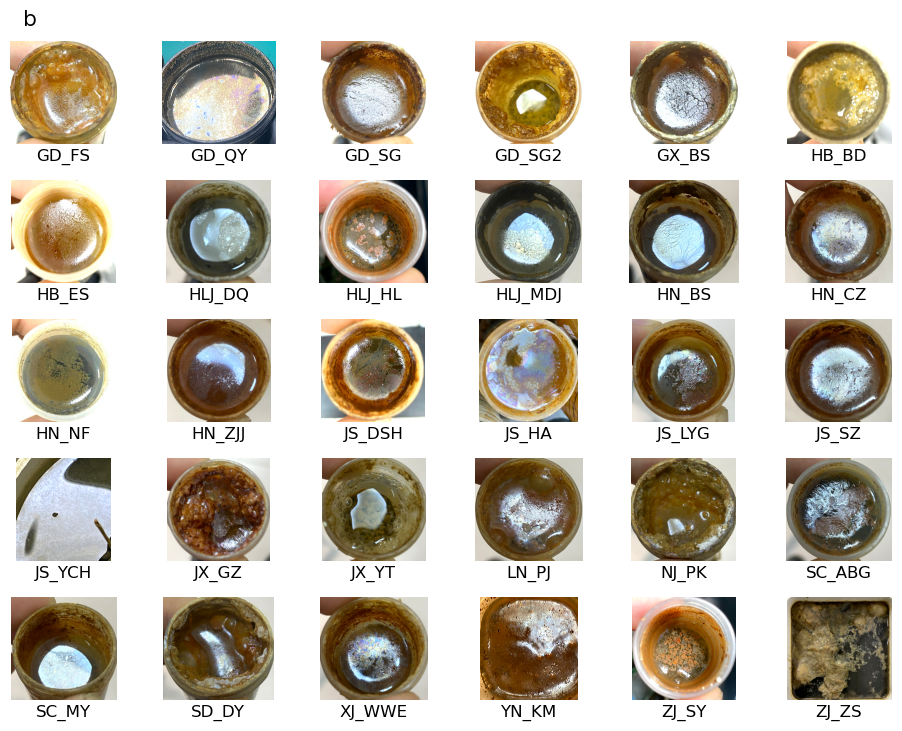

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

# 文件夹路径
folder_path = r'C:\Users\zhang\Documents\A_PhD_Thesis_SZ_2024\floating iron plaques\NATION FIBFs'

# 获取文件夹中所有 tif 文件并按名称排序
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
tif_files.sort()  # 按名称排序

# 设置图形大小
fig, axes = plt.subplots(5,6, figsize=(9.5, 7.1))  # 增大图像大小以适应高分辨率输出
axes = axes.ravel()  # 将axes矩阵展开成一维数组，便于迭代

# 读取并显示图像
for i, tif_file in enumerate(tif_files):
    img_path = os.path.join(folder_path, tif_file)
    img = Image.open(img_path)
    
    # 检查图像模式，如果是RGBA（带透明度的图像），转换为RGB
    if img.mode == 'RGBA':
        img = img.convert('RGB')
    
    # 进行适度增强，例如调整对比度
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.2)  # 增强对比度，1.0 为原始，1.2 稍微增强对比度

    # 显示图像，确保使用灰度映射，如果是灰度图像
    ax = axes[i]
    ax.imshow(img, cmap='gray')  # 强制使用灰度色图
    ax.axis('off')  # 关闭坐标轴
    
    # 获取文件名（去掉扩展名）
    name_without_extension = os.path.splitext(tif_file)[0]
    
    # 添加图像的文件名作为标签，放置在图像下方
    ax.text(0.5, -0.05, name_without_extension, ha='center', va='top', fontsize=12, color='black', transform=ax.transAxes)

# 调整布局，使标签和图像不重叠
plt.tight_layout()

# Add label at the top-left corner of the figure
fig.text(0.05, 1.0, 'b', font='Inter', fontsize=16, fontweight='bold', color='black')

# 保存图像时指定 DPI 以保持高分辨率
plt.savefig("Extended Data Fig. 1b.tif", dpi=600, bbox_inches='tight')  # 设置dpi为300以确保高分辨率

# 显示合成图
plt.show()


In [41]:
from PIL import Image

# Open the two image files
img1 = Image.open("Extended Data Fig. 1a.tif")
img2 = Image.open("Extended Data Fig. 1b.tif")

# Ensure the images are in 'RGBA' (which includes an alpha channel) to handle transparency
img1 = img1.convert("RGBA")
img2 = img2.convert("RGBA")

# Get dimensions of both images
width1, height1 = img1.size
width2, height2 = img2.size

# Create a new image with width equal to the maximum width of the two images,
# and height equal to the sum of both image heights, with a white background
combined_width = max(width1, width2)
combined_height = height1 + height2
combined_width2 = max(width1, width2)+10
# Create a new image with a white background (RGBA mode)
combined_img = Image.new("RGBA", (combined_width, combined_height), (255, 255, 255, 255))  # White background

# Calculate the horizontal positions to center the images
x1 = (combined_width - width1) // 2  # Center the first image horizontally
x2 = (combined_width2 - width2) // 2  # Center the second image horizontally

# Paste the two images into the new image, one on top of the other, aligned to the center
combined_img.paste(img1, (x1, 0), img1)  # Paste img1 with its alpha channel (transparency handling)
combined_img.paste(img2, (x2, height1), img2)  # Paste img2 with its alpha channel (transparency handling)

# Convert back to RGB before saving, as TIFF doesn't always support RGBA properly in all contexts
combined_img = combined_img.convert("RGB")

# Save the combined image
combined_img.save("Extended Data Fig. 1.tif", dpi=(600, 600))


Extended Data Fig. 2a

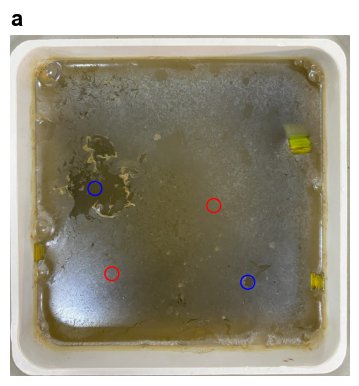

In [118]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load the image
image_path = r"C:\Users\zhang\Documents\A_PhD_Thesis_SZ_2024\floating iron plaques\python chart\Extended Data Fig.2a.jpg"
img = mpimg.imread(image_path)

# Create the plot
plt.figure(figsize=(4, 4))

# Display the image
plt.imshow(img)

plt.text(0.0, 1.075, 'a', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top', 
         horizontalalignment='left', fontweight='bold', color='black')

# Define random (or fixed) positions for red and blue circles
# Red circles (random or predefined)
red_circles = [(0.3, 0.3), (0.6, 0.5)]  # Example random positions
# Blue circles (random or predefined)
blue_circles = [(0.25, 0.55), (0.7, 0.275)]  # Example random positions

# Plot red circles
for (x, y) in red_circles:
    plt.scatter(x, y, color="none", s=100, edgecolors='red', alpha=1, marker='o', transform=plt.gca().transAxes)

# Plot blue circles
for (x, y) in blue_circles:
    plt.scatter(x, y, color="none", s=100, edgecolors='blue', alpha=1, marker='o', transform=plt.gca().transAxes)

# Remove axes
plt.axis('off')

# Save the modified image
plt.tight_layout()
plt.savefig("Extended Data Fig.2a_modified.jpg", dpi=600)

# Show the result
plt.show()


Extended Data Fig. 2b

C:\Users\zhang\AppData\Local\Temp\ipykernel_24372\2160803054.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['TIME'])


Interval (43, 184): Average CH4 concentration = 2.9167 ppmv
Interval (251, 412): Average CH4 concentration = 2.7647 ppmv
Interval (494, 644): Average CH4 concentration = 2.9205 ppmv
Interval (719, 912): Average CH4 concentration = 2.7976 ppmv
Interval (0, 40): Average CH4 concentration = 2.7976 ppmv
Interval (195, 240): Average CH4 concentration = 2.7976 ppmv
Interval (420, 450): Average CH4 concentration = 2.7976 ppmv
Interval (660, 700): Average CH4 concentration = 2.7976 ppmv


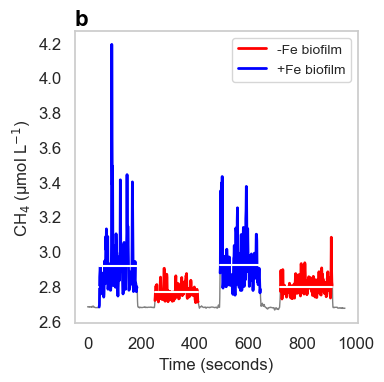

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # Make sure to import seaborn
from matplotlib import rcParams

# Set Seaborn style
sns.set(style="whitegrid")
# 设置字体为 Arial
plt.rcParams['font.family'] = 'Arial'
# Plot setup
sns.set(style="whitegrid")

# 加载数据
file_path = r"C:\Users\zhang\Documents\A_PhD_Thesis_SZ_2024\floating iron plaques\TG10-01213-2024-11-04T220000舟山and盘锦.csv"
df = pd.read_csv(file_path, parse_dates=['TIME'])

# 确保 'TIME' 列是datetime格式
df['TIME'] = pd.to_datetime(df['TIME'])

# 过滤数据以仅显示22:46到23:02之间的时间
filtered_df = df[(df['TIME'].dt.time >= pd.to_datetime('22:46').time()) & 
                 (df['TIME'].dt.time <= pd.to_datetime('23:02').time())].copy()

# 计算从22:46:00开始的时间差（以秒为单位）
start_time = filtered_df['TIME'].min()
filtered_df['time_diff_seconds'] = (filtered_df['TIME'] - start_time).dt.total_seconds()

# 将 CH4 浓度从 ppbv 转换为 ppmv
filtered_df['CH4'] = filtered_df['CH4'] / 1000  # 转换为 ppmv

# 指定四个区间
intervals = [(43, 184), (251, 412), (494, 644), (719, 912)]
intervals2= [(0, 40),(195, 240),(420, 450),(660, 700)]

# 计算每个区间的平均浓度
averages = {}
for start, end in intervals:
    # 根据时间差选择区间
    segment = filtered_df[(filtered_df['time_diff_seconds'] >= start) & 
                          (filtered_df['time_diff_seconds'] <= end)]
    
    # 计算该区间的平均浓度
    avg_concentration = segment['CH4'].mean()
    averages[(start, end)] = avg_concentration
# 计算每个区间的平均浓度
averages2 = {}
for start, end in intervals2:
    # 根据时间差选择区间
    segment2 = filtered_df[(filtered_df['time_diff_seconds'] >= start) & 
                          (filtered_df['time_diff_seconds'] <= end)]
    
    # 计算该区间的平均浓度
    avg_concentration2 = segment['CH4'].mean()
    averages[(start, end)] = avg_concentration2
# 输出每个区间的平均浓度
for interval, avg in averages.items():
    print(f"Interval {interval}: Average CH4 concentration = {avg:.4f} ppmv")
# 输出每个区间的平均浓度
for interval, avg in averages2.items():
    print(f"Interval {interval}: Average CH4 concentration = {avg:.4f} ppmv")
# 创建图形
plt.figure(figsize=(4, 4))

# 绘制 CH4 浓度曲线
plt.plot(filtered_df['time_diff_seconds'], filtered_df['CH4'], color='grey', linewidth=1)

# 绘制粉红色系线条用于特定区间
pink_colors = ['red', 'red']  # 粉红色系

for (start, end), color in zip([(251, 412), (719, 912)], pink_colors):
    # 获取该区间的时间范围
    segment = filtered_df[(filtered_df['time_diff_seconds'] >= start) & 
                          (filtered_df['time_diff_seconds'] <= end)]
    # 绘制该区间的曲线
    plt.plot(segment['time_diff_seconds'], segment['CH4'], color='red', linewidth=2, zorder=2,label='-Fe biofilm')
for (start, end), color in zip([(43, 184), (494, 644)], pink_colors):
    # 获取该区间的时间范围
    segment = filtered_df[(filtered_df['time_diff_seconds'] >= start) & 
                          (filtered_df['time_diff_seconds'] <= end)]
    # 绘制该区间的曲线
    plt.plot(segment['time_diff_seconds'], segment['CH4'], color='blue', linewidth=2, zorder=2,label='+Fe biofilm')

# 绘制每个区间的平均值线
for (start, end), avg in averages.items():
    # 获取区间的时间范围
    x_range = filtered_df[(filtered_df['time_diff_seconds'] >= start) & 
                          (filtered_df['time_diff_seconds'] <= end)]['time_diff_seconds']
    
    # 绘制该区间内的虚线
    plt.plot([x_range.min(), x_range.max()], [avg, avg], color='white', linestyle='-', 
             label=f"Avg {start}-{end}: {avg:.4f} ppmv", zorder=2)

plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel(r'CH$_4$ (μmol L$^{-1}$)', fontsize=12)

# 增加字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 获取所有的 handles 和 labels
handles, labels = plt.gca().get_legend_handles_labels()

# 只选择 '-Fe biofilm' 和 '+Fe biofilm' 的 handles 和 labels
filtered_handles = [handles[1], handles[3]]
filtered_labels = [labels[1], labels[3]]

# 设置图例，仅显示所选项
plt.legend(handles=filtered_handles, labels=filtered_labels, loc='upper right', fontsize=10)

# 添加 label "A" 在左上角
plt.text(0.0, 1.075, 'b', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top', 
         horizontalalignment='left', fontweight='bold', color='black')
plt.grid(False)
plt.tight_layout()

plt.savefig("Extended Data Fig.2b.tif", dpi=600, bbox_inches='tight')
# 显示图表
plt.show()



In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

# Set Seaborn style
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Arial'

# Load data
file_path = r"C:\Users\zhang\Documents\A_PhD_Thesis_SZ_2024\floating iron plaques\TG10-01213-2024-11-04T220000舟山and盘锦.csv"
df = pd.read_csv(file_path, parse_dates=['TIME'])

# Ensure 'TIME' column is in datetime format
df['TIME'] = pd.to_datetime(df['TIME'])

# Filter data to show only times between 22:46 and 23:02
filtered_df = df[(df['TIME'].dt.time >= pd.to_datetime('22:46').time()) & 
                 (df['TIME'].dt.time <= pd.to_datetime('23:02').time())].copy()

# Calculate time difference in seconds from 22:46:00
start_time = filtered_df['TIME'].min()
filtered_df['time_diff_seconds'] = (filtered_df['TIME'] - start_time).dt.total_seconds()

# Convert CH4 concentration from ppbv to ppmv
filtered_df['CH4'] = filtered_df['CH4'] / 1000  # Convert to ppmv

# Define intervals for analysis
intervals = [(43, 184), (251, 412), (494, 644), (719, 912)]
intervals2 = [(0, 40), (195, 240), (420, 450), (660, 700)]

# Calculate average concentrations for each interval
averages = {}
for start, end in intervals:
    segment = filtered_df[(filtered_df['time_diff_seconds'] >= start) & 
                          (filtered_df['time_diff_seconds'] <= end)]
    avg_concentration = segment['CH4'].mean()
    averages[(start, end)] = avg_concentration

averages2 = {}
for start, end in intervals2:
    segment2 = filtered_df[(filtered_df['time_diff_seconds'] >= start) & 
                           (filtered_df['time_diff_seconds'] <= end)]
    avg_concentration2 = segment2['CH4'].mean()
    averages2[(start, end)] = avg_concentration2

# Print average concentrations
for interval, avg in averages.items():
    print(f"Interval {interval}: Average CH4 concentration = {avg:.4f} ppmv")
for interval, avg in averages2.items():
    print(f"Interval {interval}: Average CH4 concentration = {avg:.4f} ppmv")

# Create a DataFrame to store the extracted data for plotting
plot_data = filtered_df[['time_diff_seconds', 'CH4']].copy()

# Add a column to indicate the interval type
plot_data['Interval_Type'] = None
for start, end in intervals:
    plot_data.loc[(plot_data['time_diff_seconds'] >= start) & 
                  (plot_data['time_diff_seconds'] <= end), 'Interval_Type'] = '+Fe biofilm'
for start, end in intervals2:
    plot_data.loc[(plot_data['time_diff_seconds'] >= start) & 
                  (plot_data['time_diff_seconds'] <= end), 'Interval_Type'] = '-Fe biofilm'

# Save the extracted data to an Excel file
plot_data.to_excel("plot_data.xlsx", index=False)

C:\Users\zhang\AppData\Local\Temp\ipykernel_14700\3683113884.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['TIME'])


Interval (43, 184): Average CH4 concentration = 2.9167 ppmv
Interval (251, 412): Average CH4 concentration = 2.7647 ppmv
Interval (494, 644): Average CH4 concentration = 2.9205 ppmv
Interval (719, 912): Average CH4 concentration = 2.7976 ppmv
Interval (0, 40): Average CH4 concentration = 2.6794 ppmv
Interval (195, 240): Average CH4 concentration = 2.6780 ppmv
Interval (420, 450): Average CH4 concentration = 2.6789 ppmv
Interval (660, 700): Average CH4 concentration = 2.6747 ppmv


Extended Data Fig. 2c

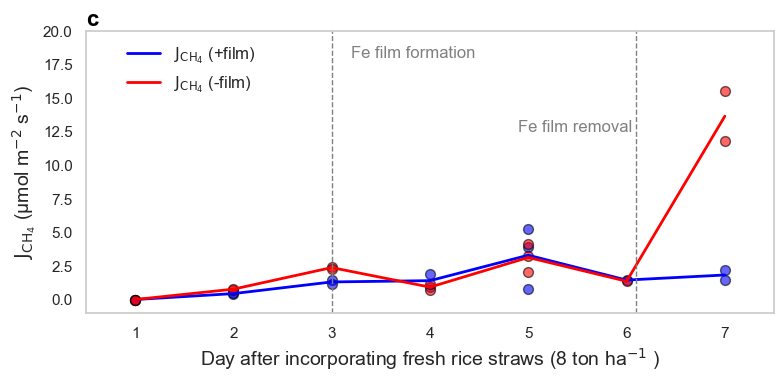

In [154]:
import matplotlib.pyplot as plt
import numpy as np
# Plot setup
sns.set(style="whitegrid")

# Data
days = [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 7, 7]
JCH4_plus_film = [0.029714989, 0.026471081, 0.422457012, 0.516802019, 1.509333849, 1.164550811, 1.907879797, 0.957568461, 0.775413723, 5.296178146, 3.907653789, 1.476522584, 1.462654626, 2.246289596]
JCO2_plus_film = [0.138178648, 0.078959227, 24.86684793, 29.98923234, 69.10562234, 67.33607136, 23.1669789, 21.30617738, 31.06491345, 26.77748861, 22.59350601, 32.05982256, 45.91501792, 38.07586852]
JCH4_minus_film = [0.028517441, 0.025418291, 0.766029304, 0.835228061, 2.477837038, 2.335807289, 0.709430579, 1.192215533, 2.044758783, 4.171151715, 3.259415419, 1.387612494, 15.5158231, 11.82442364]
JCO2_minus_film = [0.006579936, 0.006579936, 38.55758443, 41.35161229, 107.756341, 103.9378363, 28.74938346, 23.63217928, 30.49658425, 27.42833034, 33.47186076, 37.93124355, 38.26251494, 35.08952589]

# Unique days for grouping
unique_days = sorted(set(days))

# Grouped data by day (mean values)
JCH4_plus_film_grouped = [np.mean([JCH4_plus_film[i] for i in range(len(days)) if days[i] == day]) for day in unique_days]
JCO2_plus_film_grouped = [np.mean([JCO2_plus_film[i] for i in range(len(days)) if days[i] == day]) for day in unique_days]
JCH4_minus_film_grouped = [np.mean([JCH4_minus_film[i] for i in range(len(days)) if days[i] == day]) for day in unique_days]
JCO2_minus_film_grouped = [np.mean([JCO2_minus_film[i] for i in range(len(days)) if days[i] == day]) for day in unique_days]

# Create the plot with enhanced style
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot methane flux (+film and -film) on the first Y-axis with line
ax1.plot(unique_days, JCH4_plus_film_grouped, label=r"$\mathrm{J}_{\mathrm{CH_4}}$ (+film)", color='blue', linestyle='-', linewidth=2)
ax1.plot(unique_days, JCH4_minus_film_grouped, label=r"$\mathrm{J}_{\mathrm{CH_4}}$ (-film)", color='red', linestyle='-', linewidth=2)

# Add original scatter points for methane flux (+film and -film)
ax1.scatter(days, JCH4_plus_film, color='blue', alpha=0.6, marker='o', s=50, edgecolor='black')
ax1.scatter(days, JCH4_minus_film, color='red', alpha=0.6, marker='o', s=50, facecolors='red', edgecolor='black')

# Set labels for the first Y-axis
ax1.set_xlabel('Day after incorporating fresh rice straws (8 ton ha$^{-1}$ )', fontsize=14)
ax1.set_ylabel(r"$\mathrm{J}_{\mathrm{CH_4}}$ (μmol m$^{-2}$ s$^{-1}$)", fontsize=14)
ax1.tick_params(axis='y')

# Customize legend: only include the line objects in the legend
# Customize legend: only include the line objects in the legend
fig.legend(
    handles=[ax1.lines[0], ax1.lines[1]],  # Corrected: closed the list with a ']'
    loc='upper left',                     # Location of the legend
    bbox_to_anchor=(0.15, 0.9),            # Position relative to the axes
    fontsize=12,                          # Font size of the legend text
    frameon=False,                        # Remove the frame around the legend
    handlelength=2                        # Adjust the length of the line in the legend
)


# Customize grid and axes
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_axisbelow(True)

# Set axis limits (example limits)
ax1.set_xlim([0.5, 7.5])  # x-axis limits
ax1.set_ylim([-1, 20])      # y-axis for CH4 (+film and -film)



# Add vertical dashed lines with annotations
ax1.axvline(x=3, color='gray', linestyle='--', linewidth=1)  # Line for iron film formation
ax1.annotate('Fe film formation', xy=(3, 15), xytext=(3.2, 18), 
             arrowprops=dict(arrowstyle="->", lw=1.5), fontsize=12, color='gray')

ax1.axvline(x=6.1, color='gray', linestyle='--', linewidth=1)  # Line for iron removal starts
ax1.annotate('Fe film removal', xy=(7.5, 15), xytext=(4.9, 12.5), 
             arrowprops=dict(arrowstyle="->", lw=1.5), fontsize=12, color='gray')
# 添加 label "A" 在左上角
plt.text(0.0, 1.075, 'c', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top', 
         horizontalalignment='left', fontweight='bold', color='black')
plt.grid(False)
# Adjust layout to prevent overlap
fig.tight_layout()

# 保存图形为高分辨率图像
plt.savefig("Extended Data Fig 2c.tif", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


Extended Data Fig. 2 (mergeda, b, c)

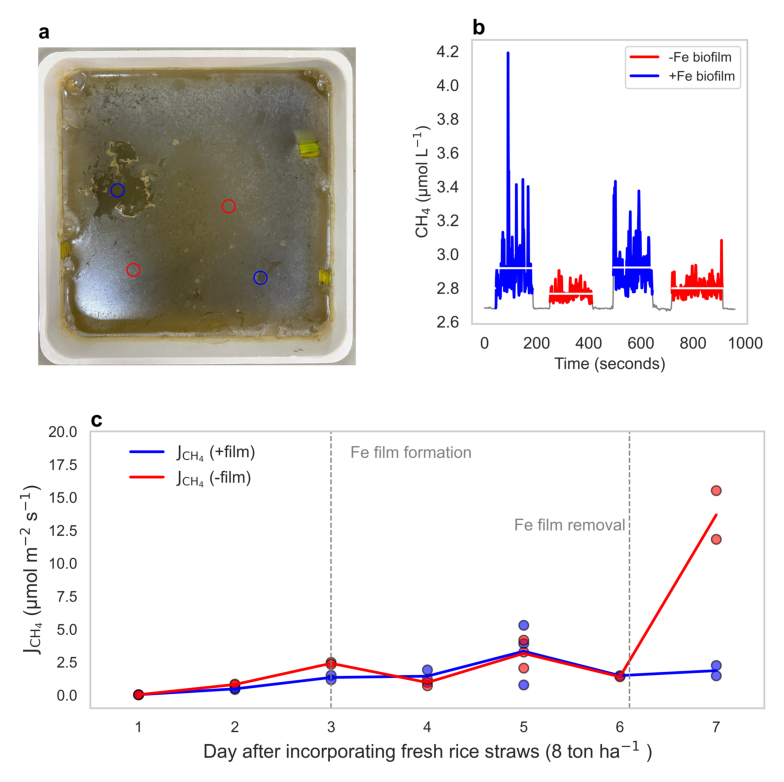

In [156]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec

# Create a figure with a specific size
fig = plt.figure(figsize=(8, 8))

# Create a 2-row, 2-column GridSpec, with the second row spanning two columns
gs = GridSpec(2, 2, figure=fig)

# Load the images
img_a = mpimg.imread("Extended Data Fig.2a_modified.jpg")
img_b = mpimg.imread("Extended Data Fig.2b.tif")
img_c = mpimg.imread("Extended Data Fig 2c.tif")

# Plot the first image (top-left)
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(img_a)
ax1.axis('off')


# Plot the second image (top-right)
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(img_b)
ax2.axis('off')


# Plot the third image (bottom row, spanning the full width)
ax3 = fig.add_subplot(gs[1, :])  # The colon means it spans both columns
ax3.imshow(img_c)
ax3.axis('off')


# Adjust layout to avoid overlap and set tight layout
plt.tight_layout()

# Save the merged figure
plt.savefig("Extended Data Fig 2.tif", dpi=600, bbox_inches='tight')

# Show the result
plt.show()


Fig. ie

Number of unique locations in the filtered data: 21
Observed CH4 flux mean: 0.6113 μmol m$^-2$ s$^-1$
Observed CH4 flux range: -0.0039 to 11.2873 μmol m$^-2$ s$^-1$
Calculated CH4 flux mean: 1.7119 μmol m$^-2$ s$^-1$
Calculated CH4 flux range: 0.0058 to 38.6650 μmol m$^-2$ s$^-1$
Unique locations: ['GD_QY' 'JS_YCH' 'GX_BS' 'HN_BS' 'GD_SG2' 'GD_SG3' 'GD_SG4' 'SC_MY'
 'GD_SG' 'JX_YT' 'JS_DSH' 'ZJ_SY' 'HLJ_HL' 'GD_FS' 'JS_BD' 'JS_WWE'
 'JS_DQ' 'JS_ABG' 'JS_R' 'JS_grid' 'HB_ES']
Number of unique locations in the filtered data: 21


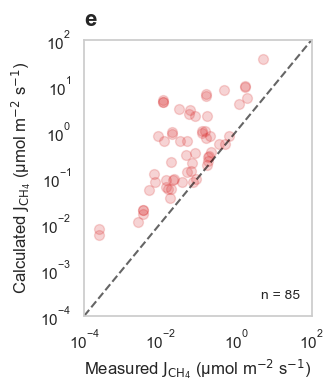

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

# Set Seaborn style
sns.set(style="whitegrid")

# Set font to Arial
rcParams['font.family'] = 'Arial'

# Read data
file_path = r"C:\Users\zhang\Documents\A_PhD_Thesis_SZ_2024\floating iron plaques\Figure 1a.csv"
data = pd.read_csv(file_path)

# Filter data to keep only (no, yes) and (yes, yes)
data = data[(data['Bubble'].isin(['no', 'yes'])) & (data['FIBF'] == 'yes')]

# Count unique locations in the filtered data
unique_locations_filtered = data['location'].nunique()
print(f"Number of unique locations in the filtered data: {unique_locations_filtered}")

# Calculate mean and range for both observed and calculated CH4 fluxes
obs_ch4_mean = data['Obs_JCH4'].mean()
obs_ch4_range = (data['Obs_JCH4'].min(), data['Obs_JCH4'].max())

calc_ch4_mean = data['Calc_JCH4'].mean()
calc_ch4_range = (data['Calc_JCH4'].min(), data['Calc_JCH4'].max())

print(f"Observed CH4 flux mean: {obs_ch4_mean:.4f} μmol m$^{-2}$ s$^{-1}$")
print(f"Observed CH4 flux range: {obs_ch4_range[0]:.4f} to {obs_ch4_range[1]:.4f} μmol m$^{-2}$ s$^{-1}$")

print(f"Calculated CH4 flux mean: {calc_ch4_mean:.4f} μmol m$^{-2}$ s$^{-1}$")
print(f"Calculated CH4 flux range: {calc_ch4_range[0]:.4f} to {calc_ch4_range[1]:.4f} μmol m$^{-2}$ s$^{-1}$")

# Display the unique location names
unique_location_names = data['location'].unique()
print("Unique locations:", unique_location_names)
# Count the number of unique locations in the filtered data
unique_locations_filtered = data['location'].nunique()
print(f"Number of unique locations in the filtered data: {unique_locations_filtered}")
# Define color and style mapping
color_map = {
    ('no', 'yes'): {'color': 'tab:red', 'marker': 'o', 'alpha': 0.2, 'size': 50, 'label': '-Bubble & +Film'},
}

# Create plot
plt.figure(figsize=(3.5, 4.1))
fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('none')  # Set figure background to transparent
ax.set_facecolor('none')         # Set axis background to transparent

# Plot scatter points
for (bubble, fibf), group_data in data.groupby(['Bubble', 'FIBF']):
    if (bubble, fibf) in color_map:  # Only plot (no, yes) and (yes, yes)
        style = color_map[(bubble, fibf)]
        plt.scatter(
            group_data['Obs_JCH4'],  # x: observed values
            group_data['Calc_JCH4'],  # y: calculated values
            c=style['color'], 
            label=style['label'],
            marker=style['marker'], 
            alpha=style['alpha'], 
            s=style['size']
        )

# Add 1:1 line
x = np.logspace(-4, 2, 100)
plt.plot(x, x, linestyle='--', color='black', alpha=0.6, label='1:1 Line')

# Set log scale and limits
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0001, 100)
plt.ylim(0.0001, 100)

# Set axis labels
plt.xlabel(r"Measured $\mathrm{J}_{\mathrm{CH_4}}$ (μmol m$^{-2}$ s$^{-1}$)", fontsize=12)
plt.ylabel(r"Calculated $\mathrm{J}_{\mathrm{CH_4}}$ (μmol m$^{-2}$ s$^{-1}$)", fontsize=12)

# Add annotation for panel label
plt.text(0.0, 1.05, 'e', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)

# Add annotation for number of data points
num_data_points = len(data)
plt.text(
    0.95, 0.05,  # Position (axes coordinates)
    f"n = {num_data_points}",  # Text
    fontsize=10, 
    ha='right',  # Horizontal alignment
    va='bottom',  # Vertical alignment
    transform=plt.gca().transAxes  # Use axes coordinates
)

# Remove grid
plt.grid(False)

# Adjust layout and save figure
plt.tight_layout()
plt.savefig("Figure 1e.tif", dpi=600, bbox_inches='tight')

# Show plot
plt.show()

Fig. 1f

C:\Users\zhang\AppData\Local\Temp\ipykernel_28516\4258493320.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['TIME'])


Interval (50, 208): Average CH4 concentration = 3.0117 ppmv
Interval (275, 450): Average CH4 concentration = 2.9951 ppmv
Interval (525, 723): Average CH4 concentration = 2.8085 ppmv
Interval (780, 1001): Average CH4 concentration = 2.8061 ppmv


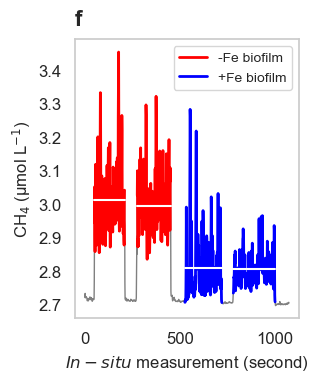

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
# 设置字体为 Arial
plt.rcParams['font.family'] = 'Arial'
# Plot setup
sns.set(style="whitegrid")

# 加载数据
file_path = r"C:\Users\zhang\Documents\A_PhD_Thesis_SZ_2024\floating iron plaques\TG10-01213-2024-11-04T211000微元法测甲烷独墅湖.csv"
df = pd.read_csv(file_path, parse_dates=['TIME'])

# 确保 'TIME' 列是datetime格式
df['TIME'] = pd.to_datetime(df['TIME'])

# 过滤数据以仅显示22:46到23:02之间的时间
filtered_df = df[(df['TIME'].dt.time >= pd.to_datetime('21:21:49').time()) & 
                 (df['TIME'].dt.time <= pd.to_datetime('21:39:41').time())].copy()

# 计算从22:46:00开始的时间差（以秒为单位）
start_time = filtered_df['TIME'].min()
filtered_df['time_diff_seconds'] = (filtered_df['TIME'] - start_time).dt.total_seconds()

# 将 CH4 浓度从 ppbv 转换为 ppmv
filtered_df['CH4'] = filtered_df['CH4'] / 1000  # 转换为 ppmv

# 指定四个区间
intervals = [(50, 208), (275, 450), (525, 723), (780, 1001)]

# 计算每个区间的平均浓度
averages = {}
for start, end in intervals:
    # 根据时间差选择区间
    segment = filtered_df[(filtered_df['time_diff_seconds'] >= start) & 
                          (filtered_df['time_diff_seconds'] <= end)]
    
    # 计算该区间的平均浓度
    avg_concentration = segment['CH4'].mean()
    averages[(start, end)] = avg_concentration

# 输出每个区间的平均浓度
for interval, avg in averages.items():
    print(f"Interval {interval}: Average CH4 concentration = {avg:.4f} ppmv")

# 创建图形
plt.figure(figsize=(3.25, 4))

# 绘制完整的 CH4 浓度变化曲线为蓝色
plt.plot(filtered_df['time_diff_seconds'], filtered_df['CH4'], color='grey', linewidth=1, label='CH4 Concentration')

# 绘制选定区间的曲线为红色
for start, end in [(50, 208), (275, 450)]:
    # 筛选选定区间的数据
    segment = filtered_df[(filtered_df['time_diff_seconds'] >= start) & 
                          (filtered_df['time_diff_seconds'] <= end)]
    
    # 绘制红色曲线
    plt.plot(segment['time_diff_seconds'], segment['CH4'], color='red', linewidth=2, zorder=2,label='-Fe biofilm')

# 绘制选定区间的曲线为蓝色
for start, end in [(525, 720), (780, 1000)]:
    # 筛选选定区间的数据
    segment1 = filtered_df[(filtered_df['time_diff_seconds'] >= start) & 
                          (filtered_df['time_diff_seconds'] <= end)]
    
    # 绘制红色曲线
    plt.plot(segment1['time_diff_seconds'], segment1['CH4'], color='blue', linewidth=2, zorder=2,label='+Fe biofilm')

# 绘制每个区间的平均值线
for (start, end), avg in averages.items():
    # 获取区间的时间范围
    x_range = filtered_df[(filtered_df['time_diff_seconds'] >= start) & 
                          (filtered_df['time_diff_seconds'] <= end)]['time_diff_seconds']
    
    # 绘制该区间内的虚线
    plt.plot([x_range.min(), x_range.max()], [avg, avg], color='white', linestyle='-', 
             label=f"Avg {start}-{end}: {avg:.4f} ppmv", zorder=3)

# 设置图表标题和标签
#plt.title(r'$\it{In-situ}$ measurement', fontsize=12,  # Larger title font sizebackgroundcolor='lightgray',  # Title background colorpad=15,  # Padding around the titleloc='center')
plt.xlabel(r'$\it{In-situ}$ measurement (second)', fontsize=12)
plt.ylabel(r'CH$_4$ (μmol L$^{-1}$)', fontsize=12)
# 设置图例，放置在右上角
# 获取所有的 handles 和 labels
handles, labels = plt.gca().get_legend_handles_labels()

# 只选择 '-Fe biofilm' 和 '+Fe biofilm' 的 handles 和 labels
filtered_handles = [handles[1], handles[3]]
filtered_labels = [labels[1], labels[4]]

# 设置图例，仅显示所选项
plt.legend(handles=filtered_handles, labels=filtered_labels, loc='upper right', fontsize=10)

# 增加字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 在图形左上角标注 (外面)
plt.text(0, 1.05, 'f', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)
plt.grid(False)
plt.tight_layout()
# 保存图形为高分辨率图像
plt.savefig("DSH_insitu_CH4_measurement.tif", dpi=600)

# 显示图表
plt.show()


Fig. 1g

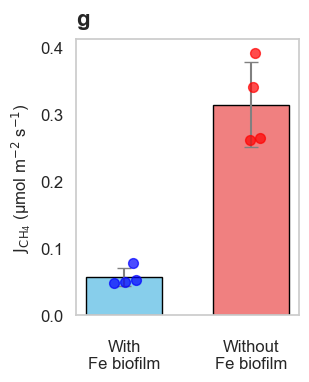

p-value = 2.145e-04, Star: ***


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
import numpy as np
# Plot setup
sns.set(style="whitegrid")
# Prepare the data
data = {
    'Treatment': [
        'With Fe film', 'Without Fe film', 'With Fe film', 'Without Fe film', 
        'With Fe film',  'Without Fe film', 'With Fe film', 
        'Without Fe film',
    ],
    'JCH4': [
        4.88728616E-02, 2.64192726E-01, 5.28661516E-02, 3.40248208E-01,
        7.78399160E-02, 2.61228131E-01, 5.03782138E-02, 3.92122785E-01
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Separate the data for treatments
with_fe_film = df[df['Treatment'] == 'With Fe film']['JCH4']
without_fe_film = df[df['Treatment'] == 'Without Fe film']['JCH4']

# Perform t-test between "With Fe film" and "Without Fe film"
t_stat, p_value = ttest_ind(with_fe_film, without_fe_film)

# Set smaller plot size (3.25, 4)
plt.figure(figsize=(3.25, 4))

# Bar chart with error bars (representing standard deviation)
mean_with_fe = with_fe_film.mean()
std_with_fe = with_fe_film.std()
mean_without_fe = without_fe_film.mean()
std_without_fe = without_fe_film.std()

# Create bar chart with error bars
bars = plt.bar(
    [1, 2],  # x positions for bars
    [mean_with_fe, mean_without_fe],  # heights of bars (means)
    yerr=[std_with_fe, std_without_fe],  # error bars (standard deviations)
    capsize=5,  # bar edge size
    color=[ 'skyblue','lightcoral'],  # colors
    edgecolor='black',  # black edges for bars
    width=0.6,  # bar width
    ecolor='grey'
)

# Scatter plot of the individual JCH4 values on top of the bars
# Add jitter in the x direction to spread the points within the bars
jitter_strength = 0.1  # Amount of horizontal jitter

# Create jittered x positions for the scatter points
x_with_fe = np.random.uniform(1 - jitter_strength, 1 + jitter_strength, len(with_fe_film))
x_without_fe = np.random.uniform(2 - jitter_strength, 2 + jitter_strength, len(without_fe_film))

# Plot scatter points with fixed y values but jittered x positions
plt.scatter(x_with_fe, with_fe_film, color='blue', s=50, alpha=0.7, zorder=5, label='With Fe film')
plt.scatter(x_without_fe, without_fe_film, color='red', s=50, alpha=0.7, zorder=5, label='Without Fe film')

# Determine appropriate star symbol based on p-value
if p_value < 0.001:
    star = '***'
elif p_value < 0.01:
    star = '**'
elif p_value < 0.05:
    star = '*'
else:
    star = 'ns'  # Not significant

# Create the full label with p-value and stars
p_value_label = f'p-value = {p_value:.3e} {star}'

# Position the p-value label wisely above the highest bar
#y_position = max(mean_with_fe + std_with_fe, mean_without_fe + std_without_fe) * 1.1

# Label the p-value and star sign
#plt.text(1.5, y_position, p_value_label, ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# 设置图表标题和标签
plt.ylabel(r'$\mathrm{J}_{\mathrm{CH_4}}$ (μmol m$^{-2}$ s$^{-1}$)', fontsize=12)
#plt.xlabel(r'$\it{In-situ}$ (second)', color='white', fontsize=12)
# Adjust font size for ticks and offset them downwards
plt.xticks([1, 2], ['With\nFe biofilm', 'Without\nFe biofilm'], fontsize=12)

# Adjust the vertical position of the ticks using tick_params
plt.gca().tick_params(axis='x', which='major', labelsize=12, pad=11.5)  # Increase pad to move labels down


plt.yticks(fontsize=12)

# Format the y-axis ticks to one decimal place and set the interval to 0.1
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))

# Ensure all spines are visible (no hidden spines)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Add a star above the first bar (With Fe film)
#first_bar_y = max(mean_with_fe + std_with_fe) * 1.05  # Position slightly above the maximum value of the first bar
#plt.text(1, first_bar_y, star, ha='center', va='bottom', fontsize=16, color='black', weight='bold')

# 在图形左上角标注 (外面)
plt.text(0, 1.05, 'g', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)
plt.grid(False)
plt.tight_layout()
plt.savefig("Fig_1_Fe_removal_bar_chart_with_jitter.tif", dpi=600)

plt.show()

# Print the p-value for reference
print(f'p-value = {p_value:.3e}, Star: {star}')


Fig. 1h

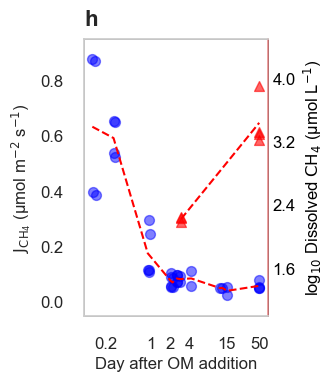

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator
import seaborn as sns

# Plot setup
sns.set(style="whitegrid")

# Data for groups
data = {
    'group': [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 8, 8, 9, 10, 11, 11, 12, 12, 12, 12],
    'day': [0.1250, 0.1296, 0.1356, 0.1400, 0.2668, 0.2726, 0.2778, 0.2836, 0.9080, 0.9508, 0.9549, 0.9613, 0.9699, 2.0584, 2.0637, 2.0799, 2.0862, 
            2.2049, 2.2130, 2.5503, 2.5556, 2.5556, 2.5573, 2.8709, 2.8837, 4.3021, 4.3090, 12.0528, 13.0590, 15.6604, 15.6711, 48.8854, 48.8889, 48.8924, 48.8958],
    'jch4': [0.88, 3.97E-01, 8.72E-01, 3.86E-01, 6.56E-01, 5.38E-01, 6.52E-01, 5.25E-01, 1.14E-01, 1.06E-01, 2.95E-01, 1.16E-01, 2.46E-01, 8.93E-02, 
             5.21E-02, 1.04E-01, 5.82E-02, 8.69E-02, 5.25E-02, 9.67E-02, 7.15E-02, 7.15E-02, 9.67E-02, 9.33E-02, 7.07E-02, 5.57E-02, 1.13E-01, 4.94E-02, 
             5.00E-02, 5.36E-02, 2.56E-02, 4.8872862E-02, 5.2866152E-02, 7.7839916E-02, 5.0378214E-02]
}

# Secondary y-axis data
second_y_data = {
    'Day': [3, 3, 3, 49, 49, 49, 49],
    'Calculated': [153.86,177.01,174.04,1677.71,2015.818970,2134.269713,8187.991902]
}
# Create a DataFrame
df = pd.DataFrame(data)

# Perform log10 transformation on the 'day' values (x-axis)
df['log10_day'] = np.log10(df['day'])

# Create DataFrame for the secondary y-axis data
df_second = pd.DataFrame(second_y_data)
df_second['log10_day'] = np.log10(df_second['Day'])
df_second['log10_Calculated'] = np.log10(df_second['Calculated'])

# Group by the 'group' column and calculate the mean and std for each group in the transformed data
group_stats = df.groupby('group')['jch4'].agg(['mean', 'std'])

# Plotting
fig, ax = plt.subplots(figsize=(3.5, 4))

# Group the data by 'group' and calculate the mean and std of the 'jch4' values
grouped_data = df.groupby('group').agg({'log10_day': 'first', 'jch4': ['mean', 'std']}).reset_index()

# Plot the mean values with 'log10_day' on the x-axis (line plot)
plt.plot(grouped_data['log10_day'], grouped_data['jch4', 'mean'], color='red', linestyle='--', 
         label='Group Mean', linewidth=1.5)


# Add error bars (standard deviation) for each group (with line width)
#plt.errorbar(grouped_data['log10_day'], grouped_data['jch4', 'mean'], yerr=grouped_data['jch4', 'std'], fmt='o', color='blue', label='Standard Deviation', capsize=5, elinewidth=0.2, capthick=0.2)

# Add scatter plot for the raw data points
plt.scatter(df['log10_day'], df['jch4'], color='blue', alpha=0.5, label='Raw Data', s=50)

# Adding labels and title
plt.xlabel(r"Day after OM addition", fontsize=12)
plt.ylabel(r"$\mathrm{J}_{\mathrm{CH_4}}$ (μmol m$^{-2}$ s$^{-1}$)", fontsize=12)
# 设置图表标题和标签
#plt.title(r"JCH$_4$ vs. film aging",  # CH 作为正常字体，4 为下标fontsize=12,  # Larger title font size backgroundcolor='lightgray',  # Title background colorpad=15,  # Padding around the title  loc='center')

# Custom x-ticks to only show specified values (0.5, 1, 2, 3, 4, 15, 50)
xticks = np.log10([0.2, 1, 2, 4, 15, 50])  # Calculate log10 values for the specified day values
plt.xticks(xticks, labels=[0.2, 1, 2, 4, 15, 50], fontsize=12)  # Display original day values on the x-axis
# Set grey spines for the plot
for spine in plt.gca().spines.values():
    spine.set_color('grey')  # Set spine color to grey
    spine.set_linewidth(0.5)  # Set line width of spines


# Display legend
#plt.legend()
# 在图形左上角标注 (外面)
plt.text(0, 1.05, 'h', fontsize=16,fontweight='bold', transform=plt.gca().transAxes)

# Adding an arrow annotation at day = 48
day_48_log = np.log10(48)  # log10 transformed value of 48

# Find the closest day value to 48
closest_day_idx = (np.abs(df['day'] - 48)).argmin()
jch4_at_48 = df.iloc[closest_day_idx]['jch4']  # Get the JCH4 value for the closest day

#plt.annotate('f', xy=(day_48_log, jch4_at_48+0.05), xytext=(day_48_log + 0.0, jch4_at_48 + 0.2),
            # arrowprops=dict(facecolor='blue', shrink=0.02, width=0.1),
            # fontsize=16, color='blue',fontweight='bold', ha='center', va='bottom')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Hide the tick marks
plt.gca().tick_params(axis='x', which='both', length=0)  # Hide x-axis ticks
plt.gca().tick_params(axis='y', which='both', length=0)  # Hide y-axis ticks


# Adjust the distance between xticks and the spine by using tick_params
plt.tick_params(axis='x', labelsize=12, pad=15)  # Adjust labelpad using pad argument

# Set y-ticks font size to 12
plt.tick_params(axis='y', labelsize=12, pad=15)
# Set the y-axis tick interval to 0.2
plt.gca().yaxis.set_major_locator(MultipleLocator(0.2))

# Set the y-axis limits
plt.ylim(-0.05, 0.95)
# 调整布局
plt.grid(False)

# Create a secondary y-axis
ax2 = ax.twinx()
ax2.scatter(df_second['log10_day'], df_second['log10_Calculated'], color='red', alpha=0.6, 
            label='Secondary Data', s=50, marker='^')
# Secondary y-axis labels and settings
ax2.set_ylabel(r"log$_{10}$ Dissolved $\mathrm{CH_4}$ (μmol L$^{-1}$)", fontsize=12, color='black')

ax2.tick_params(axis='y', labelsize=12, colors='black')
ax2.spines['right'].set_color('tab:red')
ax2.spines['right'].set_alpha(0.5)
ax2.set_ylim(1, 4.5)
ax2.yaxis.set_major_locator(MultipleLocator(0.8))
ax2.grid(False)
ax2.tick_params(axis='y', which='both', length=0)


# Group the data by 'group' and calculate the mean and std of the 'log10_Calculated' values
grouped_data2 = df_second.groupby('Day').agg({'log10_day': 'first', 
                                                'log10_Calculated': ['mean', 'std']}).reset_index()

# Plot the mean values with 'log10_day' on the x-axis (line plot)
plt.plot(grouped_data2[('log10_day', 'first')],  # Correct column reference for x-axis
         grouped_data2[('log10_Calculated', 'mean')],  # Correct column reference for y-axis
         color='red', linestyle='--', 
         label='Group Mean', linewidth=1.5)

# Show the plot
plt.tight_layout()
plt.savefig("DSH_aging.tif", dpi=600)
plt.show()


Fig. 1k

Fitted polynomial coefficients: a = 0.30610052715616826, b = -3.200182855676502, c = 8.26119104542508


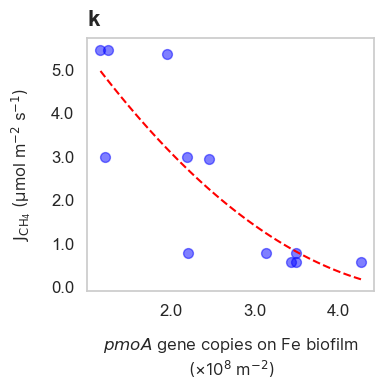

Fitted polynomial coefficients: a = 0.30610052715616826, b = -3.200182855676502, c = 8.26119104542508
R² = 0.6873
p-value = 0.0009
Number of data points: 12


In [79]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

# Plot setup
sns.set(style="whitegrid")

# 数据
pmoA_copies = np.array([3.14, 3.49, 1.21, 1.16, 3.50, 4.27, 2.46, 
                        1.95, 2.21, 3.44, 2.19, 1.25])
J_CH4 = np.array([0.787143151, 0.583349922, 2.990316612, 5.446008579, 0.787143151, 
                  0.583349922, 2.950996608, 5.346890293, 0.787143151, 0.583349922, 
                  2.990316612, 5.446008579])

# 使用 np.polyfit 进行二次多项式拟合
coefficients = np.polyfit(pmoA_copies, J_CH4, 2)  # 拟合二次多项式

# 提取拟合的系数
a, b, c = coefficients
print(f"Fitted polynomial coefficients: a = {a}, b = {b}, c = {c}")

# 使用拟合的多项式系数生成拟合曲线
pmoA_fit = np.linspace(min(pmoA_copies), max(pmoA_copies), 100)  # 在x轴范围内生成点
J_CH4_fit = a * pmoA_fit**2 + b * pmoA_fit + c  # 计算拟合曲线上的y值

# 创建图形
plt.figure(figsize=(4, 4.1))  # 调整图形大小，使得图表不那么拥挤

# 绘制散点图
plt.scatter(pmoA_copies, J_CH4, color='blue',alpha=0.5,  s=50, label='Data points')

# 绘制拟合的二次多项式曲线
plt.plot(pmoA_fit, J_CH4_fit, color='red', linestyle='--', label=f'Poly Fit: $y = {a:.2e} x^2 + {b:.2e} x + {c:.2e}$')

# 设置轴标签
# 设置标签
# 设置标签
plt.xlabel(r'$\it{pmoA}$ gene copies on Fe biofilm' + '\n' + r'(×10$^8$ m$^{-2}$)', fontsize=12, family='Inter', labelpad=12)
plt.ylabel(r'$\mathrm{J}_{\mathrm{CH_4}}$ (μmol m$^{-2}$ s$^{-1}$)', fontsize=12, family='Inter', labelpad=12)

# 设置标题
#plt.title(r'$\mathrm{JCH_4}$ vs. $\mathrm{CH_4}$ oxidation', fontsize=12,pad=15, backgroundcolor='lightgray',  fontweight='bold', family='Inter')


# 调整轴和刻度，符合 *Nature* 风格
plt.tick_params(axis='both', which='major', labelsize=12)

# 显示所有 spines
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
# Format the y-axis ticks to one decimal place
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# Format the y-axis ticks to one decimal place
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# 设置更大的边距来避免数据点与坐标轴重叠
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # 调整图表的边距
# 在图形左上角标注 (外面)
plt.text(0, 1.05, 'k', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)
plt.grid(False)

plt.tight_layout()
# 保存图像
plt.savefig("pmoA_vs_JCH4_poly_fit_with_spines.tif", dpi=600)

# 显示图像
plt.show()
# 使用 np.polyfit 进行二次多项式拟合
coefficients = np.polyfit(pmoA_copies, J_CH4, 2)  # 拟合二次多项式

# 提取拟合的系数
a, b, c = coefficients
print(f"Fitted polynomial coefficients: a = {a}, b = {b}, c = {c}")

# 使用拟合的多项式系数生成拟合曲线
pmoA_fit = np.linspace(min(pmoA_copies), max(pmoA_copies), 100)  # 在x轴范围内生成点
J_CH4_fit = a * pmoA_fit**2 + b * pmoA_fit + c  # 计算拟合曲线上的y值

# 计算R²和p-value
# 为此，我们将计算拟合值和真实值之间的残差，并用线性回归来获得R²
slope, intercept, r_value, p_value, std_err = linregress(pmoA_copies, J_CH4)
r2 = r_value**2  # R²值

# 输出R², p-value, 和数据点数量
print(f"R² = {r2:.4f}")
print(f"p-value = {p_value:.4f}")
print(f"Number of data points: {len(pmoA_copies)}")



Fig. 1i

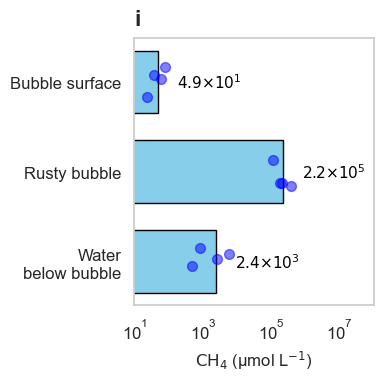

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Plot setup
sns.set(style="whitegrid")
# Plot setup
sns.set(style="whitegrid")

# 数据：每列分别是水中、气泡中、气泡表面的甲烷浓度
data = {
    'Water\nbelow bubble': [478.943, 835.676, 5813.703, 2540.123],
    'Rusty bubble': [208836.37, 181416.03, 375394.51, 112262.64],
    'Bubble surface': [58.01, 36.37, 23.55, 79.44]
}

# 转换为DataFrame
df = pd.DataFrame(data)

# 计算每组的平均值
average_values = df.mean()

# 设置图形大小
fig, ax = plt.subplots(figsize=(4, 4))

# 设置统一的条形颜色
bar_color = 'tab:blue'

# 绘制水平条形图
bars = ax.barh(average_values.index, average_values.values, color='skyblue', edgecolor='black', height=0.7)

# 随机生成散点位置（将其分布在条形内）
np.random.seed(42)  # 设置随机种子以保证可重复性
scatter_colors = ['blue', 'blue', 'blue']  # 为不同的散点设置颜色

# 在每个条形内绘制散点
for i, column in enumerate(df.columns):
    scatter_data = df[column]
    scatter_y_positions = np.random.uniform(bars[i].get_y()+ bars[i].get_height()*0.25, bars[i].get_y() + bars[i].get_height()*0.75, size=len(scatter_data))
    ax.scatter(scatter_data, scatter_y_positions, color=scatter_colors[i], alpha=0.5, zorder=5, s=50, label=column)

# 添加标签和标题，使用更简洁的字体
ax.set_xlabel(r"$\mathrm{\mathrm{CH_4}}$ (μmol L$^{-1}$)", fontsize=12)
#ax.set_title('Methane Concentration at Different Locations', fontsize=14)

# 对x轴进行对数变换
ax.set_xscale('log')

# 设置X轴刻度显示计算的平均值
x_ticks = [10**i for i in range(int(np.log10(np.min(average_values.to_numpy()))), int(np.log10(np.max(average_values.to_numpy()))) + 1)]
ax.set_xticks(x_ticks)

# 调整字体大小和样式
ax.tick_params(axis='both', labelsize=12)

# 添加网格线，增加可读性
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# 添加图例
#ax.legend(title='Location', fontsize=10, loc='upper left')

# After drawing the bars
# After drawing the bars
for bar in bars:
    width = bar.get_width()
    
    # 使用科学记数法格式化并获取指数部分
    scientific_text = f'{width:.1e}'
    
    # 手动调整指数格式，确保显示正常
    base, exponent = scientific_text.split('e')
    exponent = int(exponent)  # 转换为整数，避免出现 '01' 格式
    scientific_text = f'{base}×10^{{{exponent}}}'

    # 使用 LaTeX 格式显示上标
    ax.text(width * 3.5, bar.get_y() + bar.get_height() / 2, f'${scientific_text}$',
            va='center', ha='left', fontsize=11, color='black')

plt.xlim(10,100000000)
# Choose specific ticks based on desired range or steps
desired_xticks = [1,10, 1000, 100000, 10000000]
ax.set_xticks([tick for tick in desired_xticks if tick >= np.min(average_values)/10 and tick <= np.max(average_values)*100])

# 调整字体大小和样式
ax.tick_params(axis='both', labelsize=12)

plt.grid(False)

# 在图形左上角标注 (外面)
plt.text(0, 1.05, 'i', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig("Figure_bubble.tif", dpi=600)  # 设置dpi为600以确保高分辨率
# 显示图表
plt.show()


Fig. 1j

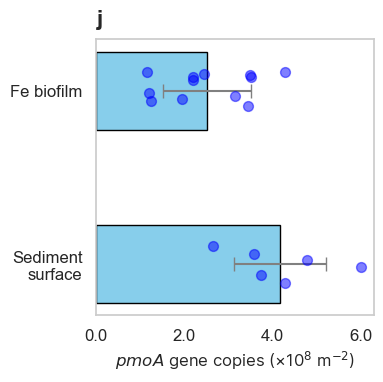

p-value: 1.559e-02


In [75]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

# Plot setup
sns.set(style="whitegrid")

# 数据
locations = ['Sediment\nsurface', 'Fe biofilm']  # Adjusted order
surface_soil_data = np.array([2.65, 3.73, 4.78, 5.99, 3.57, 4.27])
fe_biofilm_data = np.array([3.14, 3.49, 1.21, 1.16, 3.50, 4.27, 2.46, 1.95, 2.21, 3.44, 2.19, 1.25])

# Calculate means and standard deviations
pmoA_copies = [np.mean(surface_soil_data), np.mean(fe_biofilm_data)]
pmoA_std = [np.std(surface_soil_data), np.std(fe_biofilm_data)]

# 进行 t 检验
t_stat, p_value = stats.ttest_ind(fe_biofilm_data, surface_soil_data, equal_var=False)  # Welch t-test

# 创建图形，调整大小
plt.figure(figsize=(4, 4))

# 创建横向条形图，设置条形的高度为0.35
bars = plt.barh(locations, pmoA_copies, xerr=pmoA_std, capsize=5,ecolor='grey', color='skyblue', edgecolor='black', height=0.45)

# 设置标签
plt.xlabel(r'$\it{pmoA}$ gene copies (×10$^8$ m$^{-2}$)', fontsize=12, family='Inter')  # pmoA 斜体
plt.ylabel('')  # Remove y-axis label (clean for *Nature* style)

# 调整刻度标签字体大小
plt.tick_params(axis='both', which='major', labelsize=12)

# 在图形左上角标注 (外面)
plt.text(0, 1.05, 'j', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)

# 格式化 x 轴刻度
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))


# 在条形上显示数据点数
n_surface_soil = len(surface_soil_data)  # Surface soil样品的数量
n_fe_biofilm = len(fe_biofilm_data)  # Fe-rich biofilm样品的数量

# 根据条形位置稍微偏移，避免与误差棒重叠
#plt.text(pmoA_copies[0] - pmoA_std[0] * 2.1, 0, f'n = {n_surface_soil}', ha='left', va='center', fontsize=12, color='black')
#plt.text(pmoA_copies[1] - pmoA_std[1] * 3.9, 1, f'n = {n_fe_biofilm}', ha='left', va='center', fontsize=12, color='black')

# 在条形图内绘制散点
np.random.seed(200)  # 设置随机种子保证可重复性
scatter_color = 'blue'  # 散点颜色

# 为每个条形绘制散点
for i, (data, bar) in enumerate(zip([surface_soil_data, fe_biofilm_data], bars)):
    # 随机生成散点位置（将其分布在条形内）
    scatter_y_positions = np.random.uniform(bar.get_y()+ bar.get_height()*0.25, bar.get_y() + bar.get_height()*0.75, len(data))
    # 绘制散点
    plt.scatter(data, scatter_y_positions, color=scatter_color,alpha=0.5, zorder=5, s=50, label=f'{locations[i]} data')

# 调整布局
plt.grid(False)
plt.tight_layout()
# 保存图形为高分辨率图像
plt.savefig("DSH_pmoA_tidy_with_scatter.tif", dpi=600)

# 显示图形
plt.show()

# 打印 p 值
print(f'p-value: {p_value:.3e}')


Fig. 2i

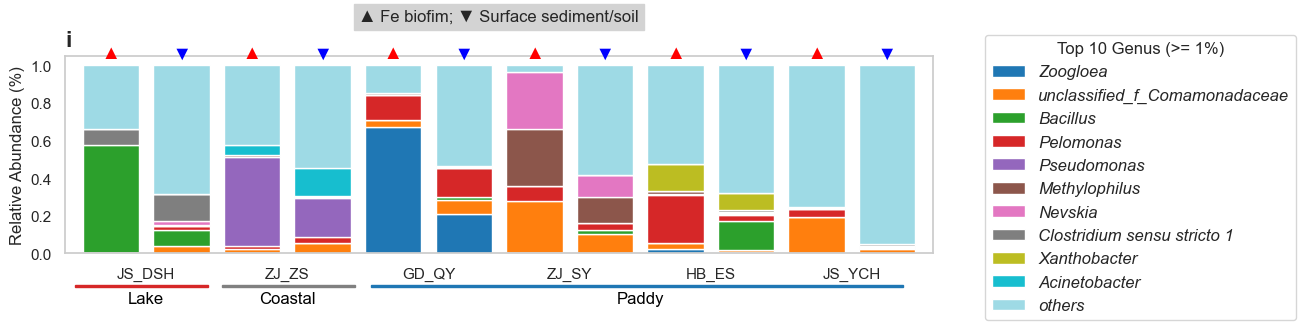

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# Data preparation (use the provided data as a dataframe)
data = {
    'Microbial Genus': ['Zoogloea', 'unclassified_f_Comamonadaceae', 'Bacillus', 'Pelomonas', 'Pseudomonas', 
                        'Methylophilus', 'Nevskia', 'Clostridium sensu stricto 1', 'Xanthobacter', 'Acinetobacter', 'others'],
    'Lake (DSH) - Fe biofilm': [0, 0, 0.575247408, 0, 0, 0, 0, 0.086050546, 0, 0.0000197, 0.338682333],
    'Lake (DSH) - Sediment': [0.001320822, 0.038146118, 0.087115089, 0.018550645, 0.00047313, 0.004396168, 
                               0.024543627, 0.139395971, 0.0000986, 0.0000591, 0.685900722],
    'Coastal (ZS) - Fe biofilm': [0.000433703, 0.022020266, 0, 0.019220912, 0.470015377, 0.009994874, 0, 
                                 0.00015771, 0.000551985, 0.054449395, 0.423155778],
    'Coastal (ZS) - Sediment': [0.000492844, 0.053956551, 0.001320822, 0.034045657, 0.20447108, 0.004001893, 
                               0.0000591, 0.007589796, 0.000275993, 0.150356819, 0.543429405],
    'Paddy (QY) - Fe biofilm': [0.672061665, 0.0351102, 0.000118283, 0.134625241, 0.000551985, 0.008733194, 
                                0.00047313, 0.000492844, 0.001636242, 0.0000197, 0.146177503],
    'Paddy (QY) - Soil': [0.207447857, 0.076430233, 0.016894689, 0.151914206, 0.001143398, 0.004810157, 
                          0.00015771, 0.002838781, 0.001537673, 0.000216851, 0.536608445],
    'Paddy (SY) - Fe biofilm': [0.0000197, 0.277096558, 0, 0.081969799, 0.0000394, 0.303394709, 0.299668809, 
                                0, 0, 0, 0.037810985],
    'Paddy (SY) - Soil': [0.0000394, 0.105054607, 0.0186295, 0.037870126, 0.0000394, 0.138252573, 0.117079998, 
                          0.002365651, 0.0000394, 0, 0.580629263],
    'Paddy (ES) - Fe biofilm': [0.021527422, 0.034262508, 0.0000394, 0.254287742, 0.004297599, 0.015751291, 
                                0.001498245, 0.000512558, 0.143634428, 0.000354848, 0.523833931],
    'Paddy (ES) - Soil': [0.010290581, 0.008634625, 0.151736782, 0.032685408, 0.006702677, 0.002365651, 
                          0.009206324, 0.007806647, 0.09058471, 0.000926547, 0.679060048],
    'Paddy (YCH) - Fe biofilm': [0.002050231, 0.190494027, 0.0000197, 0.044553089, 0.001793952, 0.003706186, 
                                 0.001182825, 0.001360249, 0.00404132, 0, 0.750798407],
    'Paddy (YCH) - Soil': [0.001951662, 0.023341087, 0.002602216, 0.002069944, 0.001833379, 0.005440997, 
                           0.004553878, 0.006268974, 0.001163112, 0.0000197, 0.950755037]
}
df = pd.DataFrame(data).set_index('Microbial Genus').T

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(13.3, 3.46))
colors = plt.cm.tab20.colors  # Generate distinct colors
# Define colors for each genus
colors = plt.cm.tab20(np.linspace(0, 1, len(df.columns)))
df.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8)
# Customize x-ticks for specific labels
custom_xticks = ['JS_DSH', 'ZJ_ZS', 'GD_QY', 'ZJ_SY', 'HB_ES', 'JS_YCH']

# Calculate the positions for x-ticks
bar_positions = np.arange(len(df))  # Position of bars on the x-axis
xticks_positions = [(i + (i + 1)) / 2 for i in range(0, len(bar_positions), 2)]  # Positioning the labels between bars

# Set x-ticks at calculated positions
ax.set_xticks(xticks_positions)
ax.set_xticklabels(custom_xticks)
# Add triangles (▲ and ▼) above each bar, alternating colors
bar_positions = np.arange(len(df))  # Position of bars on the x-axis

# We compute the sum of the bar heights for each group to position the triangles above the bars
bar_heights = df.sum(axis=1)

# Add alternating triangles
for idx, position in enumerate(bar_positions):
    # Calculate the height at the top of each bar stack
    bar_top = bar_heights.iloc[idx]
    
    # Choose the triangle based on index (even for ▲, odd for ▼)
    if idx % 2 == 0:
        # Add a right-side-up triangle (▲)
        ax.text(position, bar_top + 0.02, '▲', ha='center', va='bottom', fontsize=12, color='red')
    else:
        # Add an upside-down triangle (▼)
        ax.text(position, bar_top + 0.02, '▼', ha='center', va='bottom', fontsize=12, color='blue')

# Customize labels for regions (Optional)
region_labels = [("Lake", 0, 2), ("Coastal", 2, 4), ("Paddy", 4, len(df))]
for label, start, end in region_labels:
    mid = (start + end - 1) / 2
    ax.text(mid, -0.2, label, ha='center', va='top', fontsize=12, color='black', transform=ax.transData)


# Adjust legend with italicized text using FontProperties
handles, labels = ax.get_legend_handles_labels()
font_italic = FontProperties()
font_italic.set_style('italic')

# Modify the label for "others" to be normal font
font_normal = FontProperties()
# Update the labels and apply the normal font to "others" while keeping the others in italic
labels = [r'$\it{' + label + '}$' if label != "others" else 'others' for label in labels]

ax.legend(bbox_to_anchor=(1.05, 1.15), title='Top 10 Genus (>= 1%)', fontsize=10, loc='upper left', prop=font_italic)
# Ensure that "others" label is in normal font


# Rotate x-ticks for better readability
plt.xticks(rotation=0)
# Set labels and title
plt.title(
    r'▲ Fe biofim; ▼ Surface sediment/soil',  # CH 作为正常字体，4 为下标
    fontsize=12,  # Larger title font size
    backgroundcolor='lightgray',  # Title background color
    pad=25,  # Padding around the title
    loc='center'
)
plt.ylabel('Relative Abundance (%)', fontsize=12)
# Add label at the top-left corner
plt.text(0, 1.05, 'i', font='Arial', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)

fig.patches.append(plt.Rectangle((0.06275, 0.145), 0.1, 0.005, color='tab:red', transform=fig.transFigure, zorder=3))
fig.patches.append(plt.Rectangle((0.17285, 0.145), 0.1, 0.005, color='GREY', transform=fig.transFigure, zorder=3))
fig.patches.append(plt.Rectangle((0.285, 0.145), 0.4, 0.005, color='tab:blue', transform=fig.transFigure, zorder=3))
plt.grid(False)
# Final layout adjustments
plt.tight_layout()
plt.savefig("Figure 2i.tif", dpi=600, bbox_inches='tight')
plt.show()


Extended Data Fig. 3

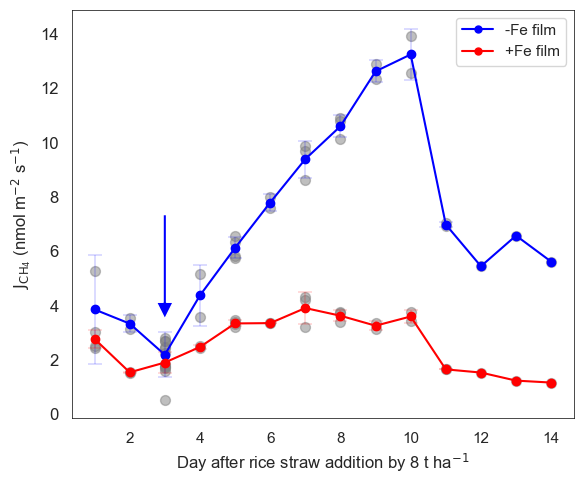

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data for new groups
data_new = {
    'Day': [1.00, 1.00, 2.00, 2.00, 3.00, 3.00, 3.00, 3.00, 3.00, 3.00, 4.00, 4.00, 
            5.00, 5.00, 5.00, 5.00, 6.00, 6.00, 7.00, 7.00, 7.00, 8.00, 8.00, 8.00, 
            9.00, 9.00, 10.00, 10.00, 11.00, 11.00, 12.00, 13.00, 14.00],
    'Replications': ['R1', 'R1', 'R2', 'R2', 'R3', 'R3', 'R3', 'R3', 'R3', 'R3', 'R4', 'R4', 
                     'R5', 'R5', 'R5', 'R5', 'R6', 'R6', 'R7', 'R7', 'R7', 'R8', 'R8', 'R8', 
                     'R9', 'R9', 'R10', 'R10', 'R11', 'R11', 'R12', 'R13', 'R14'],
    'JCH4_-Fe film': [2.445763252, 5.268139978, 3.549555648, 3.123787501, 2.428283271, 2.463733463, 
                      0.534130859, 2.237203444, 2.679288191, 2.803704097, 3.586315558, 5.159191917, 
                      5.762174439, 5.830001741, 6.547310217, 6.356157221, 7.58026808, 8.002597302, 
                      8.612677179, 9.699962735, 9.854933853, 10.88551374, 10.77773637, 10.13202338, 
                      12.32744755, 12.90562591, 12.56458702, 13.91271867, 6.919469684, 7.044899486, 
                      5.446871683, 6.574419187, 5.616422566],
    'JCH4_+Fe film': [3.018175929, 2.52870719, 1.552930596, 1.534492106, 2.698092524, 1.606782693, 
                      1.709218749, 1.757802706, 1.786192127, 1.869136064, 2.426036995, 2.526951143, 
                      3.392682146, 3.316147779, 3.459960684, 3.204785154, 3.356975864, 3.35243941, 
                      3.216126288, 4.203317185, 4.308167805, 3.394986957, 3.77220773, 3.713306999, 
                      3.371609586, 3.147713637, 3.762417034, 3.435250336, 1.650927074, 1.655577573, 
                      1.535927682, 1.239439683, 1.167771029]
}

# Create a DataFrame
df_new = pd.DataFrame(data_new)

# Group data by 'Day' and calculate the mean and std for both 'JCH4_-Fe film' and 'JCH4_+Fe film'
grouped_data_new = df_new.groupby('Day').agg({
    'JCH4_-Fe film': ['mean', 'std'],
    'JCH4_+Fe film': ['mean', 'std']
}).reset_index()

# Plotting
plt.figure(figsize=(6, 5))

# Plot 'JCH4_-Fe film' mean and error bars
line1, = plt.plot(grouped_data_new['Day'], grouped_data_new[('JCH4_-Fe film', 'mean')], color='blue', linestyle='-', marker='o', markersize=5, 
                  label=r'-Fe film', linewidth=1.5)
plt.errorbar(grouped_data_new['Day'], grouped_data_new[('JCH4_-Fe film', 'mean')], 
             yerr=grouped_data_new[('JCH4_-Fe film', 'std')], fmt='o', color='blue', 
             label=r'-Fe film Std. Dev.', capsize=5, elinewidth=0.2, capthick=0.2)

# Plot 'JCH4_+Fe film' mean and error bars
line2, = plt.plot(grouped_data_new['Day'], grouped_data_new[('JCH4_+Fe film', 'mean')], color='red', linestyle='-', marker='o', markersize=5, 
                  label=r'+Fe film', linewidth=1.5)
plt.errorbar(grouped_data_new['Day'], grouped_data_new[('JCH4_+Fe film', 'mean')], 
             yerr=grouped_data_new[('JCH4_+Fe film', 'std')], fmt='o', color='red', 
             label=r'+Fe film', capsize=5, elinewidth=0.2, capthick=0.2)

# Scatter plot for raw data points (JCH4_-Fe film) without adding to the legend
plt.scatter(df_new['Day'], df_new['JCH4_-Fe film'], color='grey', alpha=0.5, s=50)

# Scatter plot for raw data points (JCH4_+Fe film) without adding to the legend
plt.scatter(df_new['Day'], df_new['JCH4_+Fe film'], color='grey', alpha=0.5, s=50)

# Adding labels and title
plt.xlabel(r"Day after rice straw addition by 8 t ha$^{-1}$", fontsize=12)
plt.ylabel(r"$\mathrm{J}_{\mathrm{CH_4}}$ (nmol m$^{-2}$ s$^{-1}$)", fontsize=12)
#plt.title(r"JCH$_4$ vs. Day", fontsize=12, backgroundcolor='lightgray', pad=15, loc='center')

# Set grey spines for the plot
for spine in plt.gca().spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.5)

# Display legend without scatter items
plt.legend(handles=[line1, line2])

# Adding annotation for specific day
day_10 = 10
plt.annotate('f', xy=(day_10, 15), xytext=(day_10 + 0.0, 16), 
             arrowprops=dict(facecolor='blue', shrink=0.02, width=0.1),
             fontsize=16, color='blue', fontweight='bold', ha='center', va='bottom')

# Set y-ticks font size to 12
plt.tick_params(axis='y', labelsize=12)

# Find the closest day value to 3
closest_day_idx = (np.abs(df_new['Day'] - 3)).argmin()
jch4_at_3 = df_new.iloc[closest_day_idx]['JCH4_-Fe film']  # Get the JCH4 value for the closest day

plt.annotate('', xy=(3, jch4_at_3+1), xytext=(3 + 0.0, jch4_at_3 + 5),
             arrowprops=dict(facecolor='blue', shrink=0.02, width=2.5),
             fontsize=16, color='blue', fontweight='bold', ha='center', va='bottom')



plt.grid(False)
# Add label at the top-left corner
#plt.text(0, 1.05, 'b', font='Inter', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)
# Show the plot
plt.tight_layout()

# Save the plot with the new filename
plt.savefig("Extended Data Fig 3.tif", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


In [93]:
# Flatten the MultiIndex columns to a single level
grouped_data_new.columns = ['_'.join(col).strip() for col in grouped_data_new.columns.values]

# Save raw data and statistical summary to Excel
with pd.ExcelWriter('Fe_removal_analysis_with_new_groups.xlsx') as writer:
    df_new.to_excel(writer, sheet_name='Raw Data', index=False)  # Raw data
    grouped_data_new.to_excel(writer, sheet_name='Statistical Summary', index=False)  # Grouped data (mean, std)


In [253]:
# Filter the data for days after 3
data_after_day_3 = df_new[df_new['Day'] > 3]

# Calculate the ratio for each row (JCH4_-Fe film / JCH4_+Fe film) after day 3
data_after_day_3['Ratio'] = data_after_day_3['JCH4_-Fe film'] / data_after_day_3['JCH4_+Fe film']

# Calculate statistics for the ratio
ratio_range = (data_after_day_3['Ratio'].min(), data_after_day_3['Ratio'].max())
ratio_mean = data_after_day_3['Ratio'].mean()
ratio_std = data_after_day_3['Ratio'].std()

# Print the statistics
print(f"Range of the ratio after day 3: {ratio_range}")
print(f"Mean of the ratio after day 3: {ratio_mean}")
print(f"Standard deviation of the ratio after day 3: {ratio_std}")


Range of the ratio after day 3: (1.4782608696369035, 5.304347825209982)
Mean of the ratio after day 3: 2.9919503691459113
Standard deviation of the ratio after day 3: 1.0791235730932658


C:\Users\zhang\AppData\Local\Temp\ipykernel_24372\2572376682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_day_3['Ratio'] = data_after_day_3['JCH4_-Fe film'] / data_after_day_3['JCH4_+Fe film']



Supplementary Fig. S1

<Figure size 1200x1000 with 0 Axes>

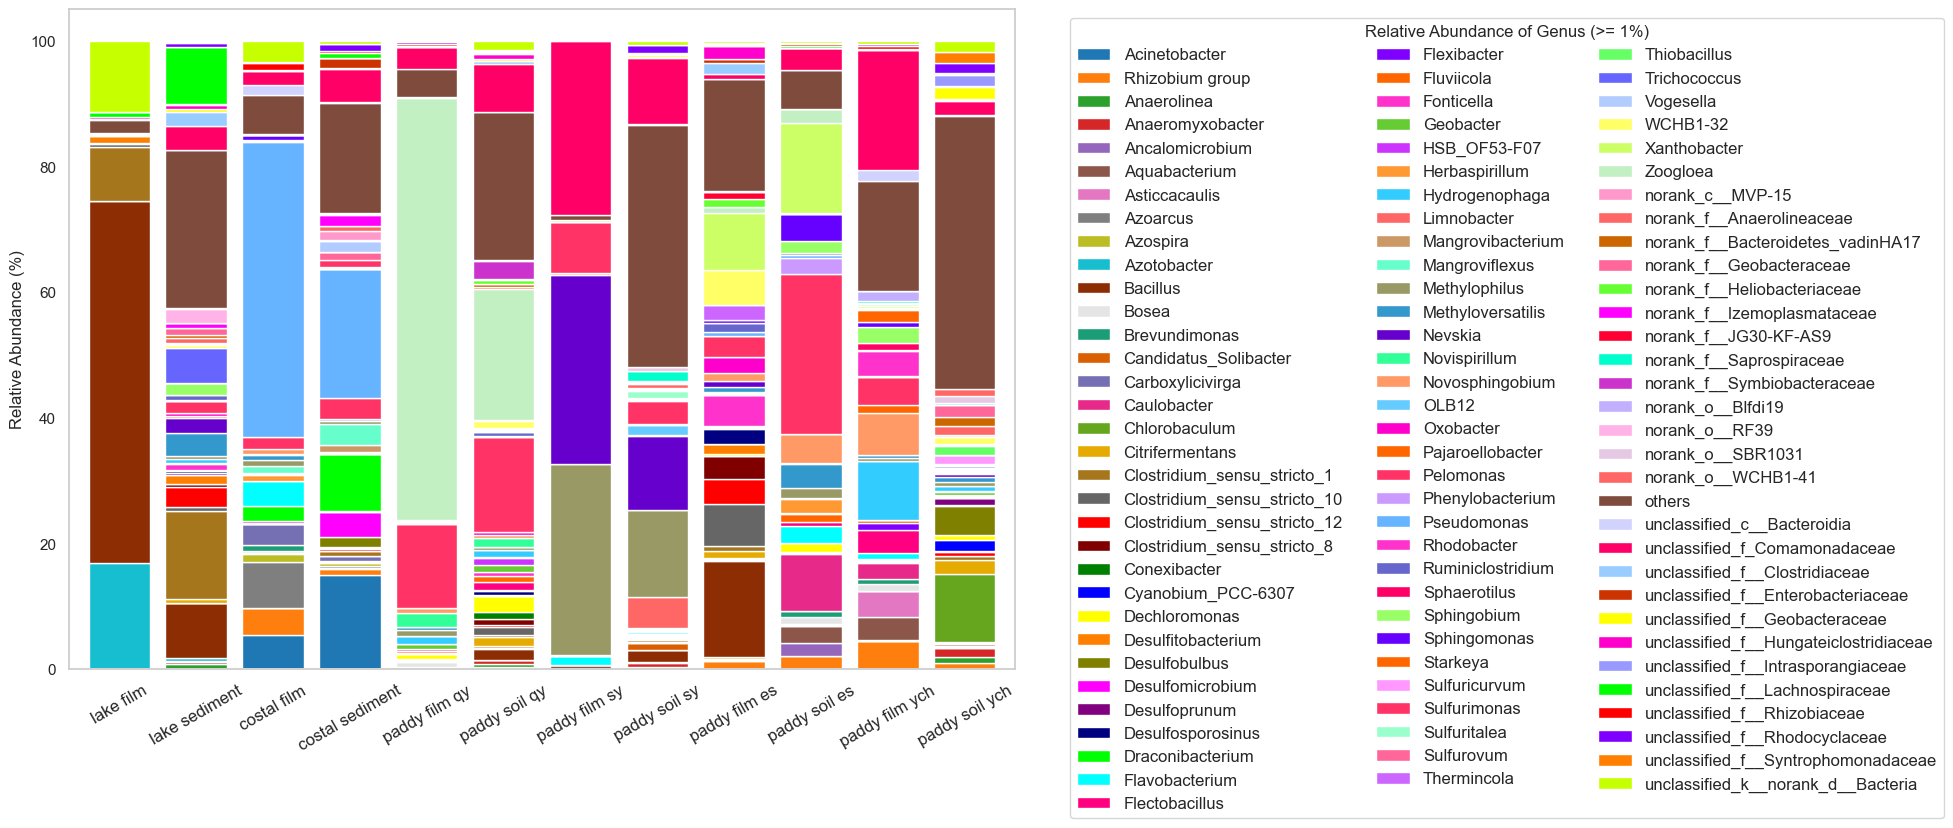

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Step 2: Load the Data
file_path = r"C:\Users\zhang\Documents\A_PhD_Thesis_SZ_2024\floating iron plaques\mo 原始数据\MJ20241122059-MJ-M-20241122067-张厦-细菌微生物多样性分析-29个样本\CommunityBarPie_20250101_052032501\taxapercentstable.csv"
data = pd.read_csv(file_path)

# Step 3: Data Preparation
# Set the 'Genus' column as the index
data.set_index('Genus', inplace=True)

# Multiply all values by 100 to convert to percentage (assuming microbial abundance data starts from the 7th column)
abundance_data = data.iloc[:, 6:] * 100  # Assuming the microbial abundance data starts from the 7th column (index 6)

# Convert column names to string type
abundance_data.columns = abundance_data.columns.astype(str)

# Remove or replace brackets and other special characters in column names
abundance_data.columns = abundance_data.columns.str.replace(r'[(){}[\]]', '', regex=True)

# Ensure all columns are numeric
abundance_data = abundance_data.apply(pd.to_numeric, errors='coerce')

# Step 4: Filter for relative abundance >= 1%
filtered_data = abundance_data.loc[:, (abundance_data >= 1).any(axis=0)]  # Keep columns with any values >= 1%

# Step 5: Merge Families by Summing Abundances
# If there are duplicate families, sum their abundances for each sample
merged_data = filtered_data.groupby(filtered_data.index).sum()

# Step 6: No longer limit to top 30, just use all genera
# All genera (family) with relative abundance >= 1% are already selected in filtered_data

# Normalize Family names to avoid duplicates
merged_data.columns = merged_data.columns.str.strip().str.lower()  # Strip spaces and convert to lowercase

# Step 7: Create a Stacked Bar Chart
# Transpose the data for plotting (each column is a family, each row is a sample)
stacked_data = merged_data.T

# Manually define a color palette with 98 unique colors (Nature Journal style)
custom_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#8c2d04", "#e5e5e5", "#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d", "#666666",
    "#ff0000", "#800000", "#008000", "#0000ff", "#ffff00", "#ff8000", "#808000", "#ff00ff", "#800080", "#000080",
    "#00ff00", "#00ffff", "#ff0080", "#8000ff", "#ff6600", "#ff33cc", "#66cc33", "#cc33ff", "#ff9933", "#33ccff",
    "#ff6666", "#cc9966", "#66ffcc", "#999966", "#3399cc", "#6600cc", "#33ff99", "#ff9966", "#66ccff", "#ff00cc",
    "#ff6600", "#ff3366", "#cc99ff", "#66b3ff", "#ff33cc", "#6666cc", "#ff0066", "#99ff66", "#6600ff", "#ff6600",
    "#ff99ff", "#ff3366", "#99ffcc", "#ff6699", "#cc66ff", "#66ff66", "#6666ff", "#b3ccff", "#ffff66", "#ccff66",
    "#c2f0c2", "#ff99cc", "#ff6666", "#cc6600", "#ff6699", "#66ff33", "#ff00ff", "#ff0033", "#00ffcc", "#cc33cc",
    "#c2b0ff", "#ffb3e6", "#e5c8e3", "#ff6666", "#7e4b3c", "#d2d2ff", "#ff0066", "#99ccff", "#cc3300", "#ffff00",
    "#ff00cc", "#9999ff", "#00ff00", "#ff0000", "#8000ff", "#ff8000", "#c6ff00", "#00ffff", "#ff3333", "#b0b0b0",
    "#ff6666", "#ff0033", "#ff99b3", "#99cc33", "#6699ff", "#cc0066", "#33cc66", "#ccff00", "#99ff00", "#ff9933",
    "#cceeff", "#6666ff", "#ff3399", "#ff9933", "#99ccff", "#cc9966", "#cccc33", "#ff9933", "#66b3b3", "#ff99cc",
    "#ff3366", "#c2f0f0", "#ff6699", "#b3ff66", "#ccffcc", "#ffff99", "#cc33ff", "#ff3300", "#ffff00", "#6600ff"
]

# Ensure the length of the custom color list matches the number of genera
if len(custom_colors) < len(stacked_data.columns):
    raise ValueError(f"Number of colors ({len(custom_colors)}) is less than the number of genera ({len(stacked_data.columns)})")

# Plot the stacked bar chart
plt.figure(figsize=(12, 10))
stacked_data.plot(kind='bar', stacked=True, figsize=(20, 8.5), color=custom_colors, width=0.8)



plt.ylabel('Relative Abundance (%)', fontsize=12)

# Rotate x-axis labels by 30 degrees
plt.xticks(rotation=30, fontsize=12)


# Create font properties and set style to italic by default
font = FontProperties()
font.set_style('italic')  # Set to italic by default

# Modify the legend: replace the long species name with a concise label
handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.replace("Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium", "Rhizobium group") for label in labels]

# Change font style of 'others' label to normal
for i, label in enumerate(labels):
    if label == 'others':
        font.set_style('normal')  # 'others' item will not be in italics

# Add the legend with 3 columns
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), title='Relative Abundance of Genus (>= 1%)', fontsize=10, loc='upper left', prop=font, ncol=3)
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.savefig("Figure genus all.tif", dpi=600, bbox_inches='tight')
plt.show()


Extended Data Fig.4b

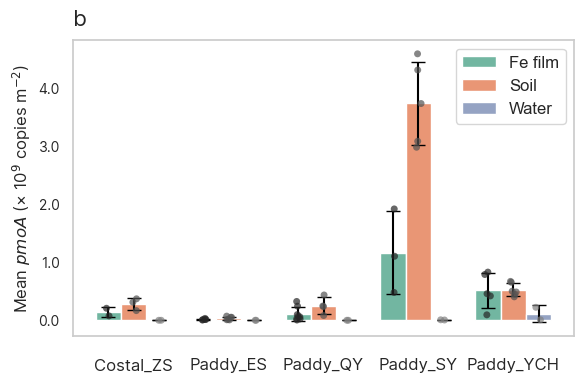

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load the dataset
df = pd.read_csv(r'C:\Users\zhang\Documents\A_PhD_Thesis_SZ_2024\floating iron plaques\qpcr.csv')

# Group the data by FIF_type and Env_type
grouped_data = df.groupby(['FIF_type', 'Env_type']).agg(
    mean_pmoA=('pmoA', 'mean'),
    std_pmoA=('pmoA', 'std'),
    count=('pmoA', 'count')
).reset_index()

# Remove rows with no valid pmoA values (optional, just in case)
grouped_data = grouped_data[grouped_data['count'] > 0]

# Set up the plot with a size optimized for 1.5-column width
plt.figure(figsize=(6, 4))  # Adjusted size for 1.5-column width

# Create the barplot including all FIF_type categories with Set2 color palette
sns.set(style="whitegrid")  # Optional: white grid style for better clarity
ax = sns.barplot(
    x='Env_type', 
    y='mean_pmoA', 
    hue='FIF_type', 
    data=grouped_data,
    palette='Set2',  # Applying the Set2 color palette
    errorbar=None  # Avoid using the deprecated ci parameter
)

# Overlay scatter points on the bars for each 'Env_type' and 'FIF_type' in grey color
sns.stripplot(
    x='Env_type', 
    y='pmoA', 
    hue='FIF_type', 
    data=df, 
    dodge=True,  # Spread the points apart for different hues (FIF_type)
    size=5,  # Size of the scatter points
    jitter=True,  # Add jitter to spread points around
    edgecolor='black',  # Black edge color for the scatter points
    alpha=0.7,  # Slight transparency for better visibility
    palette='dark:grey'  # Apply dark grey for scatter points to avoid the deprecated warning
)

# Add error bars to the plot
for i, row in grouped_data.iterrows():
    # Get the x-position based on the hue (FIF_type) and env_type
    x_pos = grouped_data[(grouped_data['FIF_type'] == row['FIF_type']) & 
                         (grouped_data['Env_type'] == row['Env_type'])].index[0]
    
    # Find the position of the bars within the plot
    bar_positions = ax.patches
    bar = bar_positions[x_pos]
    
    # Add error bars at the position of each bar
    ax.errorbar(
        bar.get_x() + bar.get_width() / 2,  # Position at the center of the bar
        row['mean_pmoA'], 
        yerr=row['std_pmoA'], 
        fmt='none', 
        color='black', 
        capsize=5
    )

# Customize the plot
#plt.title( r'Methane oxidation at the soil-water-film interface', fontsize=12,backgroundcolor='lightgray', pad=15, loc='center')

# Format the y-axis labels to show scaled values in billions (× 10^9)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e9:.1f}'))

# Add label at the top-left corner
plt.text(0, 1.05, 'b', font='Inter', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)

plt.ylabel(r'Mean $\it{pmoA}$ (× 10$^9$ copies m$^{-2}$)', fontsize=12, family='Inter')
plt.xticks(rotation=0, ha='center', fontsize=12, family='Inter')
plt.yticks(fontsize=10, family='Inter')

# Adjust the padding of x-tick labels
ax.tick_params(axis='x', pad=10)  # Shift x-tick labels slightly to the right

# Remove x-axis title
ax.set_xlabel('')

# Get the handles and labels for the bars only (exclude scatter points from the legend)
handles, labels = ax.get_legend_handles_labels()
bar_handles = handles[:len(grouped_data['FIF_type'].unique())]  # Get only the bars' handles
# Display only the bar legend
plt.legend(handles=bar_handles, title='', title_fontsize=12, loc='upper right', fontsize=12)

plt.grid(False)
# 显示并保存图像
plt.tight_layout()
plt.savefig("Extended Fig 4b.tif", dpi=600, bbox_inches='tight')
plt.show()


Extended Data Fig.4a

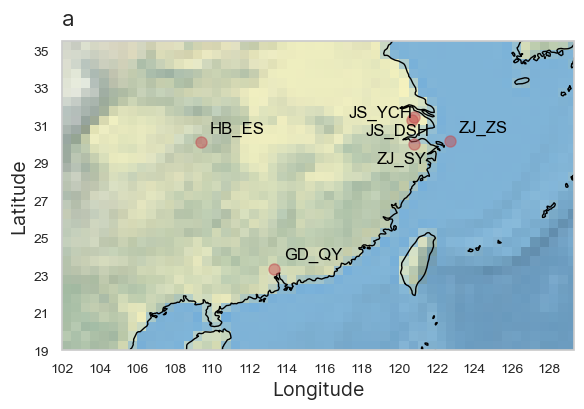

In [39]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Data: Locations and their coordinates
locations = [
    ("GD_QY", 23.35, 113.3333),  # QY, 23°35'N, 113°20'E
    ("ZJ_SY", 30.002231, 120.799483),  # SY, 30.002231°N, 120.799483°E
    ("HB_ES", 30.112331, 109.394569),  # ES, 30.112331°N, 109.394569°E
    ("JS_YCH", 31.473756, 120.771911),  # YCH, 31°28′25.52″N, 120°46′18.88″E (converted to decimal)
    ("ZJ_ZS", 30.182576, 122.686096),  # ZS, 30.182575661031482°N, 122.68609577026665°E
    ("JS_DSH", 31.289834, 120.693797)  # DSH, 31.28983389209006°N, 120.69379696036718°E
]

# Extract latitudes and longitudes
latitudes = [lat for _, lat, _ in locations]
longitudes = [lon for _, _, lon in locations]

# Calculate the minimum and maximum latitudes and longitudes
lat_min, lat_max = min(latitudes), max(latitudes)
lon_min, lon_max = min(longitudes), max(longitudes)

# Extend the ranges by 50%
lat_margin = (lat_max - lat_min) * 0.5
lon_margin = (lon_max - lon_min) * 0.5

# Calculate the new boundaries
lat_min -= lat_margin
lat_max += lat_margin
lon_min -= lon_margin
lon_max += lon_margin

# Plotting the world map with Cartopy
plt.figure(figsize=(6, 4.15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

# Plotting the locations
label_offsets = {
    "GD_QY": (0.5, 0.5),
    "ZJ_SY": (-2, -1),
    "HB_ES": (0.5, 0.5),
    "JS_YCH": (-3.5, 0.0),  # YCH label offset
    "ZJ_ZS": (0.5, 0.5),
    "JS_DSH": (-2.5, -0.8)   # DSH label offset to avoid overlap with YCH
}

for name, lat, lon in locations:
    ax.plot(lon, lat, 'ro', markersize=8, alpha=0.5)  # 'ro' for red circle markers
    offset = label_offsets[name]
    ax.text(lon + offset[0], lat + offset[1], name, fontsize=12, ha='left', color='black')  # Adjusted label positions

# Set the map's region based on the calculated boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Adding title and showing plot

# Add label at the top-left corner
plt.text(0, 1.05, 'a', font='Inter', fontsize=16, fontweight='bold', transform=plt.gca().transAxes)

# Show GPS ticks (latitude and longitude grid)
ax.grid(True, linestyle='--', color='gray', alpha=0.5)  # Customize grid lines
ax.set_xticks(range(int(lon_min), int(lon_max) + 1, 2), crs=ccrs.PlateCarree())  # Set longitude ticks
ax.set_yticks(range(int(lat_min), int(lat_max) + 1, 2), crs=ccrs.PlateCarree())  # Set latitude ticks
ax.xaxis.set_tick_params(labelsize=10)  # Customize tick label size
ax.yaxis.set_tick_params(labelsize=10)
plt.xlabel('Longitude', fontsize=14, fontname='Inter')
plt.ylabel('Latitude', fontsize=14, fontname='Inter')
# Hide grid lines and show map
plt.grid(False)

# Display and save the figure
plt.tight_layout()
plt.savefig("Extended Fig 4a.tif", dpi=600, bbox_inches='tight')
plt.show()


Extended Data Fig.4

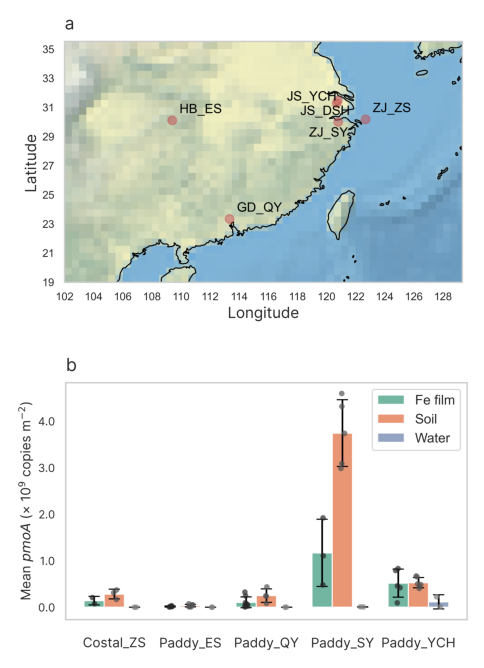

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec

# Create a figure with a specific size
fig = plt.figure(figsize=(6, 8.5))

# Create a 2-row, 1-column GridSpec
gs = GridSpec(2, 1, figure=fig)

# Load the images
img_a = mpimg.imread("Extended Fig 4a.tif")
img_b = mpimg.imread("Extended Fig 4b.tif")

# Plot the first image (top)
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(img_a)
ax1.axis('off')

# Plot the second image (bottom)
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(img_b)
ax2.axis('off')

# Adjust layout to remove excess space
plt.subplots_adjust(hspace=0.05)  # Reduce vertical space between subplots

# Save the merged figure
plt.savefig("Extended Data Fig 4.tif", dpi=600, bbox_inches='tight')

# Show the result
plt.show()


Extended Data Fig. 6

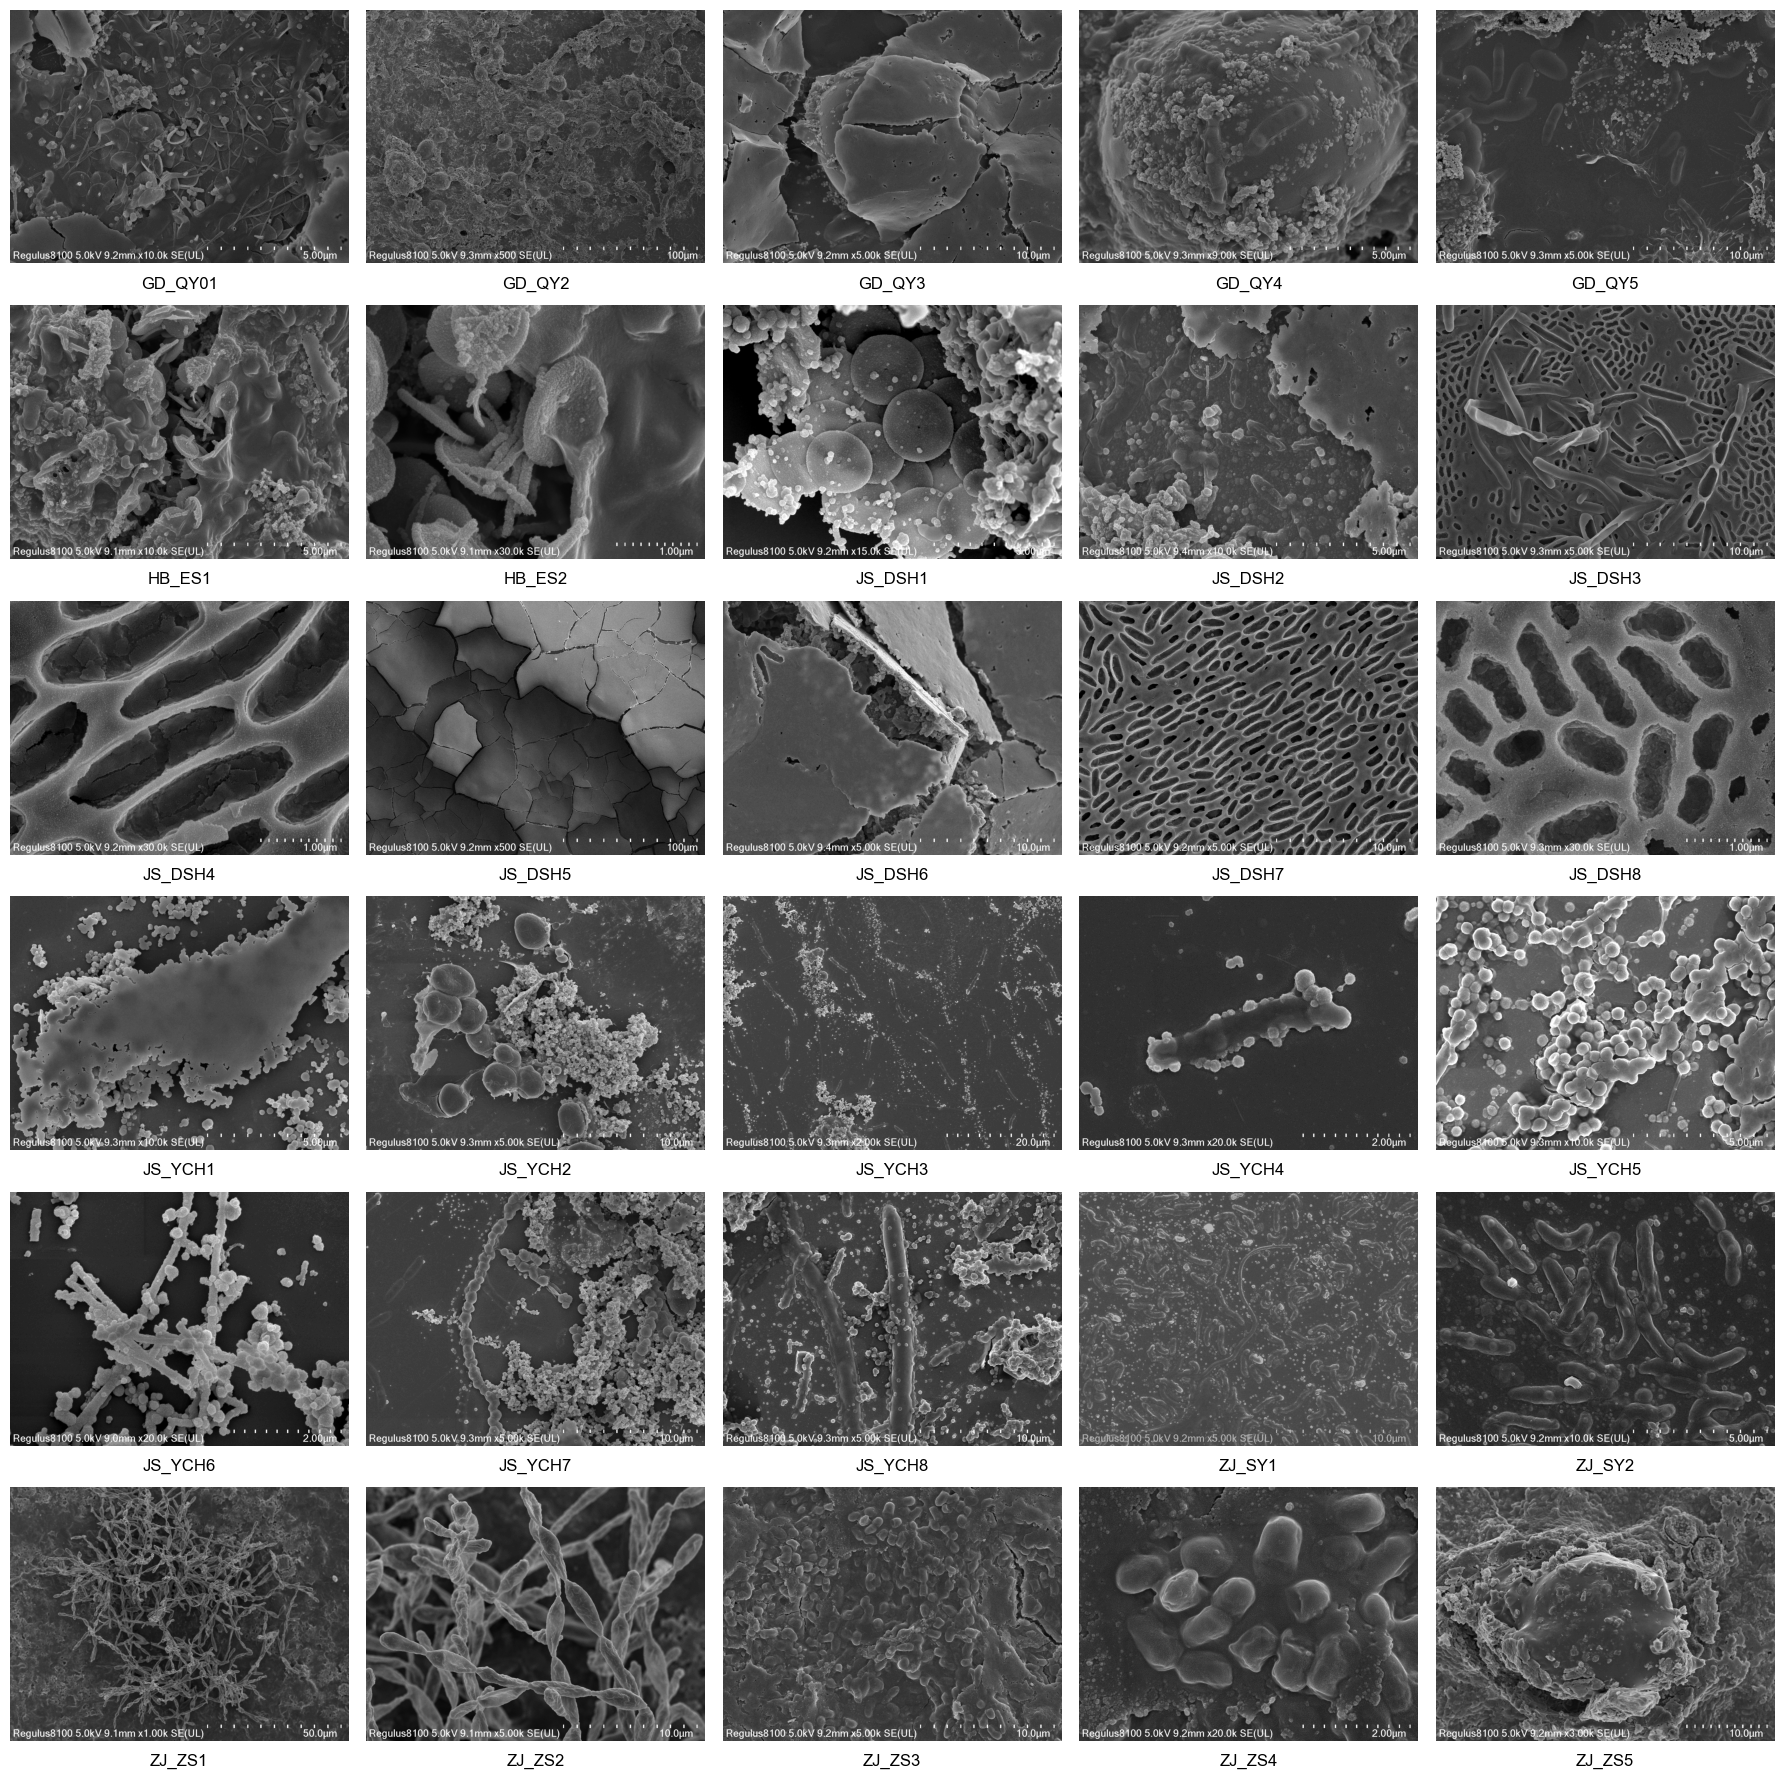

In [107]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

# 文件夹路径
folder_path = r'C:\Users\zhang\Documents\A_PhD_Thesis_SZ_2024\floating iron plaques\CZ\SEM组合图'

# 获取文件夹中所有 tif 文件并按名称排序
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
tif_files.sort()  # 按名称排序

# 设置图形大小
fig, axes = plt.subplots(6, 5, figsize=(18, 18))  # 增大图像大小以适应高分辨率输出
axes = axes.ravel()  # 将axes矩阵展开成一维数组，便于迭代

# 读取并显示图像
for i, tif_file in enumerate(tif_files):
    img_path = os.path.join(folder_path, tif_file)
    img = Image.open(img_path)
    
    # 检查图像模式，如果是RGBA（带透明度的图像），转换为RGB
    if img.mode == 'RGBA':
        img = img.convert('RGB')
    
    # 进行适度增强，例如调整对比度
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.2)  # 增强对比度，1.0 为原始，1.2 稍微增强对比度

    # 显示图像，确保使用灰度映射，如果是灰度图像
    ax = axes[i]
    ax.imshow(img, cmap='gray')  # 强制使用灰度色图
    ax.axis('off')  # 关闭坐标轴
    
    # 获取文件名（去掉扩展名）
    name_without_extension = os.path.splitext(tif_file)[0]
    
    # 添加图像的文件名作为标签，放置在图像下方
    ax.text(0.5, -0.05, name_without_extension, ha='center', va='top', fontsize=12, color='black', transform=ax.transAxes)

# 调整布局，使标签和图像不重叠
plt.tight_layout()

# 保存图像时指定 DPI 以保持高分辨率
plt.savefig("Extended Data Fig 5.tif", dpi=600)  # 设置dpi为600以确保高分辨率

# 显示合成图
plt.show()


Extended Data Fig. 7

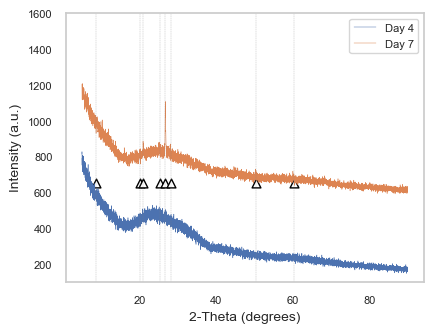

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径和样本列名称
file_path = r"C:\Users\zhang\Documents\A_PhD_Thesis_SZ_2024\floating iron plaques\CZ\张厦 西交利物浦大学XRD 20241106\Copy of xrd.csv"
sample_columns = ['DSH_nFe1', 'DSH_Fe4']  # 指定的样本列
sample_labels = ['Day 4', 'Day 7']  # 图例的描述性标签


# 标注的峰位置
peak_positions = [8.77, 20.13, 20.96, 25.29, 26.78, 28.13, 50.35, 60.26]

# 读取CSV数据
data = pd.read_csv(file_path)

# 确保文件中有'2-Theta (degrees)'列和指定样本列
if '2-Theta (degrees)' not in data.columns or not all(col in data.columns for col in sample_columns):
    raise ValueError("数据文件中缺少必要的列: '2-Theta (degrees)' 或样本列")

# 提取所需数据
x = data['2-Theta (degrees)']

# 创建堆叠折线图
plt.figure(figsize=(4.5, 3.5))  # Nature子刊常用的宽高比
offset = 100  # 用于堆叠的偏移量
for sample, label in zip(sample_columns, sample_labels):
    plt.plot(x, data[sample] + offset, label=label, linewidth=0.35)
    offset += data[sample].max() * 0.6  # 增加偏移量以堆叠曲线

# 在指定的峰位置添加标注
for peak in peak_positions:
    plt.axvline(x=peak, color='gray', linestyle='--', linewidth=0.3, alpha=0.6)  # 添加垂直线
    plt.scatter([peak], [data[sample_columns[0]].max() * 0.9],
                color='white', edgecolor='black', marker='^', s=40)  # 镂空三角形标记

# 添加图例和标签
plt.xlabel('2-Theta (degrees)', fontsize=10)
plt.ylabel('Intensity (a.u.)', fontsize=10)
#plt.title('Stacked XRD Patterns with Peak Annotations', fontsize=10, pad=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(100, 1600)  # 设置y轴范围
plt.legend(loc='upper right', fontsize=8)  # 显示图例
plt.grid(False)
plt.tight_layout()
# 保存图表到默认文件名
plt.savefig("Extended Data Fig_stacked_xrd_patterns.tif", dpi=600, bbox_inches='tight')  # 高分辨率保存

# 显示图表
plt.show()
